In [1]:
%load_ext autoreload
%autoreload 1
%aimport twitterClient

In [2]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt


In [104]:
# Fields to be retrieved
response_fields = ['created_at',"entities", "text", "lang", "public_metrics", 'geo','author_id']

user_fields=['username']
# Initialising the twitter client
client = twitterClient.twitterClient()

# # Using paginator retrieving all the required tweets. We will be receiving all the tweets from the last 7 days
# # tweets = tweepy.Paginator(client.get_users_tweets, id=client.get_user(username="trussliz").data.id, max_results=100).flatten()
tweets_dict_list=[]
for response in tweepy.Paginator(client.search_recent_tweets, query='"#UK" "Immigration"', user_fields=['name','username','location','verified','description'], tweet_fields = response_fields, max_results=100, expansions='author_id'):
    tweets = response.data
    users = response.includes["users"]
    
    users = {user["id"]: user for user in users}

    for tweet in tweets:
        tweet_obj = {
            "id": tweet['id'],
            "text": tweet.get("text"),
            "time": str(tweet.get("created_at")),
            "hastags": [hastag['tag'].lower() for hastag in tweet.get("entities").get("hashtags")] if tweet.get("entities") and tweet.get("entities").get("hashtags") else None,
            "mentions": [mention['username'].lower() for mention in tweet.get("entities").get("mentions")] if tweet.get("entities") and tweet.get("entities").get("mentions") else None,
            "language": tweet.get("lang").strip(),
            "retweet count": tweet.get("public_metrics").get("retweet_count"),
            "like_count": tweet.get("public_metrics").get("like_count"),
            "country": tweet.get('geo') if tweet.get('geo') else None,
            'author_id': str(tweet.author_id),
            "username": str(users[tweet.author_id].username)
        }
        tweets_dict_list.append(tweet_obj)



In [109]:
tweets_data_as_dict = {'data': tweets_dict_list}

with open("COSC2671-assign1-Immigration.json", 'w', encoding="utf-8") as data:
    json.dump(tweets_data_as_dict, data, indent = 6)


In [76]:
file = open('COSC2671-assign1-Immigration.json')
tweets = json.load(file)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
tweets_df = pd.DataFrame (tweets['data'], columns = ['id', 'text', 'time', 'hastags', 'mentions', 'language', 'retweet count', 'like_count', 'country','author_id', 'username'])


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [157]:
len(tweets_df)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16023

In [79]:
tweets_df.dtypes

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                int64
text             object
time             object
hastags          object
mentions         object
language         object
retweet count     int64
like_count        int64
country          object
author_id        object
username         object
dtype: object

In [80]:
tweets_df['id'] = tweets_df['id'].astype(str)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16023 entries, 0 to 16022
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             16023 non-null  object
 1   text           16023 non-null  object
 2   time           16023 non-null  object
 3   hastags        766 non-null    object
 4   mentions       14641 non-null  object
 5   language       16023 non-null  object
 6   retweet count  16023 non-null  int64 
 7   like_count     16023 non-null  int64 
 8   country        48 non-null     object
 9   author_id      16023 non-null  object
 10  username       16023 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
from datetime import datetime

# for index in range(0, len(tweets_dict_list)):
#     tweets_dict_list[index]['time'] = datetime.datetime.strptime(tweets_dict_list[index]['time'], '%Y-%m-%d %H:%M:%S%z')
date_list = []
for tweet in tweets_df['time']:
    date_list.append(datetime.strptime(tweet, '%Y-%m-%d %H:%M:%S%z'))
#    tweets_df[tweet]['time'] = datetime.strptime(tweet['time'], '%Y-%m-%d %H:%M:%S%z')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
tweets_df['time'] = date_list

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
tweets_df['year'] = tweets_df['time'].apply(lambda x: x.year)
tweets_df['month'] = tweets_df['time'].apply(lambda x: x.month)
tweets_df['day'] = tweets_df['time'].apply(lambda x: x.day)
tweets_df['hour'] = tweets_df['time'].apply(lambda x: x.hour)
hourly_tweets_df = tweets_df[['year','month', 'day', 'hour', 'id']].groupby(['year','month', 'day', 'hour']).count().reset_index()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
hourly_tweets_df['time'] = pd.to_datetime(hourly_tweets_df[['year', 'month', 'day', 'hour']])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
hourly_tweets_df

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year  month  day  hour   id                time
0    2022     10   11     8   75 2022-10-11 08:00:00
1    2022     10   11     9  132 2022-10-11 09:00:00
2    2022     10   11    10  187 2022-10-11 10:00:00
3    2022     10   11    11  163 2022-10-11 11:00:00
4    2022     10   11    12  144 2022-10-11 12:00:00
..    ...    ...  ...   ...  ...                 ...
164  2022     10   18     4   42 2022-10-18 04:00:00
165  2022     10   18     5   77 2022-10-18 05:00:00
166  2022     10   18     6   72 2022-10-18 06:00:00
167  2022     10   18     7  118 2022-10-18 07:00:00
168  2022     10   18     8   29 2022-10-18 08:00:00

[169 rows x 6 columns]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Count')

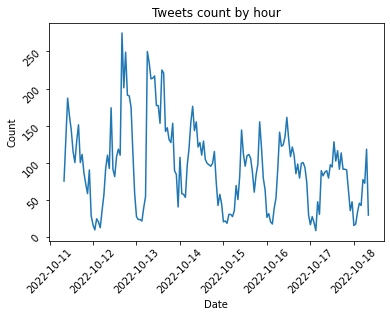

In [88]:

#plt.hist(tweets_df['created_at'], rwidth=0.7, bins = 7)
plt.plot(hourly_tweets_df['time'], hourly_tweets_df['id'])

plt.tick_params(labelrotation=45)
plt.title("Tweets count by hour")
plt.xlabel("Date")
plt.ylabel("Count")


In [89]:
top_users = tweets_df['username'].value_counts().index.tolist()[:10]


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
top_users_tweets = tweets_df[tweets_df['username'].isin(top_users)]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
top_users_tweets = top_users_tweets[['username','id']].groupby(['username']).count().reset_index()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Count')

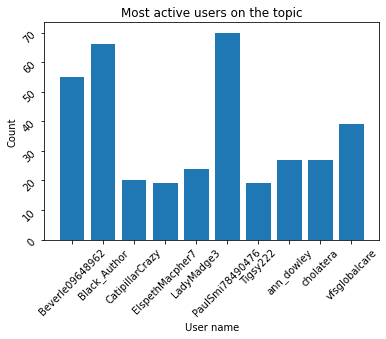

In [92]:
plt.bar(top_users_tweets['username'], top_users_tweets['id'])
plt.tick_params(labelrotation=45)
plt.title("Most active users on the topic")
plt.xlabel("User name")
plt.ylabel("Count")



In [93]:
top_liked_tweets = tweets_df.copy()


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
top_liked_tweets = top_liked_tweets.sort_values('like_count', ascending=False).head(10)



/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Count')

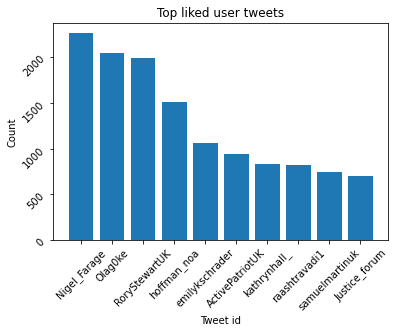

In [95]:
plt.bar(top_liked_tweets['username'], top_liked_tweets['like_count'])
plt.tick_params(labelrotation=45)
plt.title("Top liked user tweets")
plt.xlabel("Tweet id")
plt.ylabel("Count")



In [96]:
from collections import Counter

hashtags = []
hashtags_list_filter = filter(lambda x: (x != None), tweets_df['hastags'])

non_none_hashtags = list(hashtags_list_filter)

for hashtag in non_none_hashtags:
    hashtags.extend(hashtag)
    
hashtagsFreqCounter = Counter()
hashtagsFreqCounter.update(hashtags)

df = pd.DataFrame()
terms = []
counts = []
for term, count in hashtagsFreqCounter.most_common(10):
    terms.append(term)
    counts.append(count)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Count')

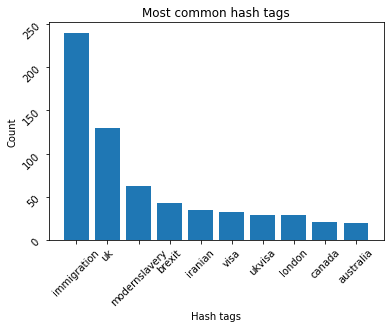

In [97]:
plt.bar(terms, counts)
plt.tick_params(labelrotation=45)
plt.title("Most common hash tags")
plt.xlabel("Hash tags")
plt.ylabel("Count")

In [98]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], '')    
    return text

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-98-845894ae8a36>:2: DeprecationWarning: invalid escape sequence \w
  link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)


In [99]:
def processTweet(text, tokenizer, stemmer, stopwords):
    
    # coverting to lower case
    text = text.lower()
    text = strip_links(text)
    # tokenising the text
    lTokens = tokenizer.tokenize(text)
    
    lTokens = [token.strip() for token in lTokens]
    # separating into stems
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])


    # removing stopwords, digits, links, hashtags, and @mentions
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit() and not tok.startswith("#") and not tok.startswith("@")]



/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import re,string

tweetTokeniser = nltk.tokenize.TweetTokenizer()

lPunct = list(string.punctuation)

lStopwords = nltk.corpus.stopwords.words('english') + lPunct + [ 'via', '’']

tweetStemmer = nltk.stem.SnowballStemmer("english")

termFreqCounter = Counter()


token_dic = {}
for index, tweet in tweets_df.iterrows():
    
    tweetText = tweet['text']
    
    
    
    
    
     # coverting to lower case
    tweetText = tweetText.lower()
    tweetText = strip_links(tweetText)
    # tokenising the text
    lTokens = tweetTokeniser.tokenize(tweetText)
    
    lTokens = [token.strip() for token in lTokens]
    # separating into stems
    lStemmedTokens = set([tweetStemmer.stem(tok) for tok in lTokens])


    # removing stopwords, digits, links, hashtags, and @mentions


    
    lTokens = [tok for tok in lStemmedTokens if tok not in lStopwords and not tok.isdigit() and tok!= "rt" and not tok.startswith("#") and not tok.startswith("@")]
    
    
    #processTweet(text=tweetText, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)
    
    
    
    
    
    
    
    
    
    token_dic[tweet['id']] = { 'time' : tweet['time'], 'tokens' : lTokens }
    termFreqCounter.update(lTokens)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/melvinmeshach/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [101]:
token_dic

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'1582284891173310465': {'time': Timestamp('2022-10-18 08:18:10+0000', tz='UTC'),
  'tokens': ['britain',
   'prais',
   'show',
   'tri',
   'british',
   'joker',
   'rule',
   'india',
   '…',
   'indian',
   'allegi',
   'say',
   'b',
   'origin']},
 '1582284888006627328': {'time': Timestamp('2022-10-18 08:18:09+0000', tz='UTC'),
  'tokens': ['britain',
   'prais',
   'show',
   'tri',
   'british',
   'joker',
   'rule',
   'india',
   '…',
   'indian',
   'allegi',
   'say',
   'b',
   'origin']},
 '1582284725431177216': {'time': Timestamp('2022-10-18 08:17:30+0000', tz='UTC'),
  'tokens': ['britain',
   'prais',
   'show',
   'tri',
   'british',
   'joker',
   'rule',
   'india',
   '…',
   'indian',
   'allegi',
   'say',
   'b',
   'origin']},
 '1582284679193178115': {'time': Timestamp('2022-10-18 08:17:19+0000', tz='UTC'),
  'tokens': ['britain',
   'prais',
   'show',
   'tri',
   'british',
   'joker',
   'rule',
   'india',
   '…',
   'indian',
   'allegi',
   'say',
   

In [102]:
del termFreqCounter["…"]


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
termFreqCounter.most_common(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('immigr', 9671),
 ('uk', 6682),
 ('illeg', 2486),
 ('govern', 2123),
 ('home', 2049),
 ('relax', 1929),
 ('rule', 1742),
 ('braverman', 1554),
 ('say', 1504),
 ('plan', 1485)]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


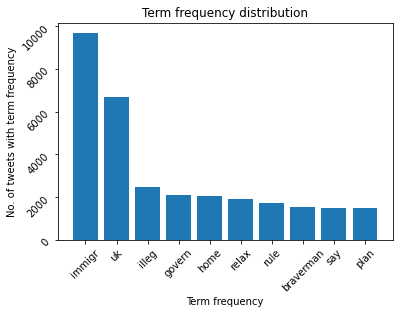

In [104]:
y = [count for tag, count in termFreqCounter.most_common(10)]
x = [tag for tag, count in termFreqCounter.most_common(10)]

plt.bar(x, y)
plt.tick_params(labelrotation=45)

plt.title("Term frequency distribution")
plt.ylabel('No. of tweets with term frequency')
plt.xlabel('Term frequency')
plt.show()

In [105]:
for term, count in termFreqCounter.most_common(100):
    print(term + ': ' + str(count))

immigr: 9671
uk: 6682
illeg: 2486
govern: 2123
home: 2049
relax: 1929
rule: 1742
braverman: 1554
say: 1504
plan: 1485
suella: 1406
reform: 1345
visa: 1328
tori: 1315
year: 1243
prepar: 1238
stop: 1214
help: 1115
truss: 1079
onli: 1028
polici: 1011
peopl: 988
pm: 984
offic: 982
nigerian: 962
migrant: 946
liz: 946
indian: 907
take: 903
key: 879
cut: 876
whi: 870
figur: 864
secretari: 859
launch: 855
start: 848
problem: 842
women: 842
job: 838
regim: 835
crackdown: 823
cloth: 818
led: 805
small: 799
even: 797
boat: 793
iranian: 786
thing: 773
prove: 771
least: 767
concern: 767
enter: 757
widespread: 754
keep: 750
process: 744
india: 740
intent: 739
perman: 736
p: 703
cross: 703
week: 695
channel: 681
past: 669
mani: 667
gate: 658
pro: 653
deal: 650
favorit: 648
35,000: 639
british: 627
mps: 626
sunday: 624
1,065: 624
want: 598
countri: 589
trade: 589
exc: 587
exclud: 572
eu: 569
need: 528
britain: 523
issu: 516
hotel: 514
work: 500
would: 497
origin: 489
get: 487
make: 481
everi: 477
citi

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
def change_words(counter, dic, from_word, to_word):
    counter[to_word] = termFreqCounter[from_word]
    del counter[from_word]
    for tweet_id in dic:
        dic[tweet_id] = { 'time': dic[tweet_id]['time'] , 'tokens': list(map(lambda x: x.replace(from_word, to_word), dic[tweet_id]['tokens']))}


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
change_words(termFreqCounter, token_dic, "immigr", "immigrate")
change_words(termFreqCounter, token_dic, "illeg", "illegal")
change_words(termFreqCounter, token_dic, "govern", "government")
change_words(termFreqCounter, token_dic, "prepar", "prepare")
change_words(termFreqCounter, token_dic, "onli", "online")
change_words(termFreqCounter, token_dic, "polici", "policy")
change_words(termFreqCounter, token_dic, "peopl", "people")
change_words(termFreqCounter, token_dic, "offic", "office")
change_words(termFreqCounter, token_dic, "whi", "white")
change_words(termFreqCounter, token_dic, "figur", "figure")
change_words(termFreqCounter, token_dic, "secretari", "secretary")
change_words(termFreqCounter, token_dic, "mani", "many")
change_words(termFreqCounter, token_dic, "favorit", "favorite")
change_words(termFreqCounter, token_dic, "countri", "country")
change_words(termFreqCounter, token_dic, "exclud", "exclude")
change_words(termFreqCounter, token_dic, "issu", "issue")


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
for term, count in termFreqCounter.most_common(100):
    print(term + ': ' + str(count))

immigrate: 9671
uk: 6682
illegal: 2486
government: 2123
home: 2049
relax: 1929
rule: 1742
braverman: 1554
say: 1504
plan: 1485
suella: 1406
reform: 1345
visa: 1328
tori: 1315
year: 1243
prepare: 1238
stop: 1214
help: 1115
truss: 1079
online: 1028
policy: 1011
people: 988
pm: 984
office: 982
nigerian: 962
migrant: 946
liz: 946
indian: 907
take: 903
key: 879
cut: 876
white: 870
figure: 864
secretary: 859
launch: 855
start: 848
problem: 842
women: 842
job: 838
regim: 835
crackdown: 823
cloth: 818
led: 805
small: 799
even: 797
boat: 793
iranian: 786
thing: 773
prove: 771
least: 767
concern: 767
enter: 757
widespread: 754
keep: 750
process: 744
india: 740
intent: 739
perman: 736
p: 703
cross: 703
week: 695
channel: 681
past: 669
many: 667
gate: 658
pro: 653
deal: 650
favorite: 648
35,000: 639
british: 627
mps: 626
sunday: 624
1,065: 624
want: 598
trade: 589
country: 589
exc: 587
exclude: 572
eu: 569
need: 528
britain: 523
issue: 516
hotel: 514
work: 500
would: 497
origin: 489
get: 487
make:

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


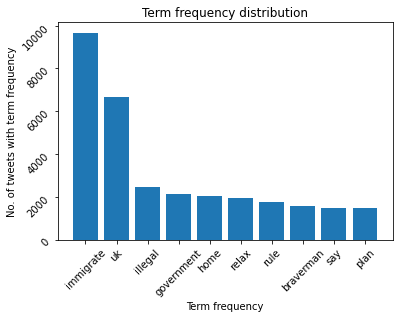

In [109]:
y = [count for tag, count in termFreqCounter.most_common(10)]
x = [tag for tag, count in termFreqCounter.most_common(10)]

plt.bar(x, y)
plt.tick_params(labelrotation=45)

plt.title("Term frequency distribution")
plt.ylabel('No. of tweets with term frequency')
plt.xlabel('Term frequency')
plt.show()

# Sentiment Analysis


In [110]:
import codecs

posWordFile = 'positive-words.txt'
negWordFile = 'negative-words.txt'

# loading the positive words
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    for sLine in fPos:
        lPosWords.append(sLine.strip())

setPosWords = set(lPosWords)


# load set of negative words
lNegWords = []
with codecs.open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    for sLine in fNeg:
        lNegWords.append(sLine.strip())

setNegWords = set(lNegWords)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
def vaderSentimentAnalysis():
    
    sentAnalyser = SentimentIntensityAnalyzer()

    lSentiment = []
    for tweet_id in token_dic:
        try:
            date = token_dic[tweet_id]['time']
            lTokens = token_dic[tweet_id]['tokens']

            dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))
            lSentiment.append([pd.to_datetime(date), dSentimentScores['compound']])

            
            print(*lTokens, sep=', ')
            for cat,score in dSentimentScores.items():
                print('{0}: {1}, '.format(cat, score), end='')
            print()

        except KeyError as e:
            pass


    return lSentiment

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
token_dic

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'1582284891173310465': {'time': Timestamp('2022-10-18 08:18:10+0000', tz='UTC'),
  'tokens': ['britain',
   'prais',
   'show',
   'tri',
   'british',
   'joker',
   'rule',
   'india',
   '…',
   'indian',
   'allegi',
   'say',
   'b',
   'origin']},
 '1582284888006627328': {'time': Timestamp('2022-10-18 08:18:09+0000', tz='UTC'),
  'tokens': ['britain',
   'prais',
   'show',
   'tri',
   'british',
   'joker',
   'rule',
   'india',
   '…',
   'indian',
   'allegi',
   'say',
   'b',
   'origin']},
 '1582284725431177216': {'time': Timestamp('2022-10-18 08:17:30+0000', tz='UTC'),
  'tokens': ['britain',
   'prais',
   'show',
   'tri',
   'british',
   'joker',
   'rule',
   'india',
   '…',
   'indian',
   'allegi',
   'say',
   'b',
   'origin']},
 '1582284679193178115': {'time': Timestamp('2022-10-18 08:17:19+0000', tz='UTC'),
  'tokens': ['britain',
   'prais',
   'show',
   'tri',
   'british',
   'joker',
   'rule',
   'india',
   '…',
   'indian',
   'allegi',
   'say',
   

In [113]:
def countWordSentimentAnalysis():
   
    lSentiment = []
    for tweet_id in token_dic:
            date = token_dic[tweet_id]['time']
            lTokens = token_dic[tweet_id]['tokens']

            posNum = len([tok for tok in lTokens if tok in setPosWords])

            negNum = len([tok for tok in lTokens if tok in setNegWords])
            sentiment = posNum - negNum

            lSentiment.append([pd.to_datetime(date), sentiment])


            for token in lTokens:
                if token in setPosWords:
                    print(Fore.RED + token + ', ', end='')
                elif token in setNegWords:
                    print(Fore.BLUE + token + ', ', end='')
                else:
                    print(Style.RESET_ALL + token + ', ', end='')

            print(': {}'.format(sentiment))


    return lSentiment


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
from colorama import Fore, Back, Style

def centiment_graph(frequency, sentiment_type, lSentiment):
    series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
    
    series.set_index('date', inplace=True)
    
    series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)
    if( frequency == "daily" ):
        newSeries = series.resample('1D').sum()
    else:
        newSeries = series.resample('1H').sum()
    newSeries.plot()
    plt.title(sentiment_type + " " + frequency + " sentiment analysis")
    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
count_lSentiment = countWordSentimentAnalysis()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
immigrate, eu, uk, non-eu, ..., almost, entir, replac, : 0
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
bn, give, right, ▸, uk, visa, studi, british, live, read, announc, work, immigrate, new, citizen, articl, rout, citizenship, full, provid, hong, kong, : 2
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, sh

britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
take, watch, limit, immigrate, abolit, chanc, country, jame, robert, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
inform, free, stuck, india-uk, worker, read, …, trade, deal, skill, ca, : 1
immigrate, migrat, 240,000, research, fold, show, watch, refuge, : 0
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
chang, differ, afghani, term, …, immigrate, subject, surfin, altogeth, : 0
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
chang, differ, afghani, term, …, i

britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax, : 0
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
expedit, give, head, uk, output, school, top, name, rank, grad, global, immigrate, becaus, research, country, univers, japan, includ, usa, : 1
britain,

britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
franc, chang, import, uk, religion, thank, christian, muslim, freedom, civil, elit, us, million, germany, etc, western, law, work, immigrate, realli, “, sweden, ”, spain, especi, adopt, itali, : 3
prove, uk, infant, grant, think, british, amount, legisl, parent, automat, 🇧, temporarili, immigrate, check, born, citizenship, 🇬, make, people, need, one, stateless, : 0
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax, : 0
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
true, …, : 0
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
border, posit, spurious, award, collaps, uk, proflig, government, corrupt, white, imaginari, actual, wave, tori, immigrate, citizen, instead, contract, anyth, obsess, control,

seek, fund, asylum, uk, cheaper, government, come, way, hous, online, immigrate, servic, tax, accept, people, realiti, illegal, set, abl, would, : 0
give, general, collaps, taxpay, week, told, mention, support, everi, england, g, implic, immigrate, e, help, disast, brink, yet, practic, huge, cumul, nhs, public, illegal, legal, effect, rare, : 0
border, right, uk, evid, scotland, live, refer, eu, work, immigrate, ireland, citizen, empir, policy, passport, need, thus, control, would, : 2
becom, britain, campaign, albania, ‘, alcatraz, warn, : 0
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
never, improv, take, 1/2, standard, technolog, uk, british, live, labour, product, peter, w

take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
decad, chang, posit, i'v, sick, voter, care, petti, alway, elector, flood, immigrate, littl, i'm, point, parti, in-fight, tire, vote, country, need, illegal, feel, legal, conserv, : -2
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
hope, help, : 0
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
level, evid, manag, many, money, particular, difficult, law, immigrate, littl, deal, reduc, favour, veri, interest, activ, mps, minist, major, great, servic, : 1
chang, exact, move, sourc, go, trump, …, next, articl, attack, ask, worship, stanc, stop, guy, : 0
decad, problem, …, allow, immigrate, new, deal, build, launch, recent, plan, : -1
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax, : 0
take, agre, 

look, uk, econom, screw, mayb, sue-ellen, open, immigrate, realli, wait, cassiana, arm, people, fernand, : 0
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
migrant, uk, mean, economi, workforc, impli, affect, absorb, unemploy, lazili, local, fals, immigrate, opportun, restrict, creat, labour.wa, without, total, see, : -1
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff, : -1
least, get, humili, person, uk, racism, accord, polic, problem, stori, noth, like, germany, black, els, everi, kick, german, human, i

young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani, : -1
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax, : 0
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin, : -1
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax, : 0
border, mainland, uk, may, free, think, government, ❤, europ, ️, uncontrol, ✝, amongst, eu, european, blood, pain, allow, immigrate, trauma, travel, rip, member, hand, case, control, : -2
limit, chanc, take, immigrate, country, abolit, watch, : -1
year, finish, last, …, ge, next, vote, : 0
reform, britain, prais, uk, show, admit, british, tri, mistak, leicest, joker, blame, rule, india, indian, c, committe, allegi, immigrate, overstay, say, said, violenc, b, origin, : -1
uk, office, reclassifi, modern, …, work, home, immigrate, chariti, say, issue, illegal, : 0
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, 

busi, call, base, employ, avail, weekend, cover, rang, disput, law, immigrate, matter, london, individu, appoint, sterl, includ, famili, legal, : 0
uk, office, reclassifi, safeguard, modern, away, work, home, immigrate, chariti, taken, say, minist, issue, illegal, : 0
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax, : 0
year, finish, last, combinat, …, ge, next, vote, : 0
year, finish, last, …, ge, next, vote, : 0
done, get, year, finish, last, 😡, combin, fail, immigrate, ge, say, next, policy, mps, vote, togeth, backstab, : -1
done, get, year, finish, last, 😡, combin, fail, immigrate, ge, say, next, policy, mps, vote, togeth, backstab, : -1
year, finish, last, …, ge, next, vote, : 0
year, finish, last, …, ge, next, vote, : 0
uk, cond

uk, refuge, aberdeen, well, although, …, shambl, meanwhitel, ‘, huge, king, meet, ok, crisi, : 1
gfi, : 0
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
suppli, wage, worker, minimum, white, …, plus, immigrate, wonder, continu, profit, mass, : 1
info, 👇, affair, question, tomorrow, committe, law, discuss, home, immigrate, part, justic, migrat, inquiri, lord, famili, : 0
right, pander, uk, gammon, vile, remind, absolut, sure, exist, listen, much, scum, immigrate, present, pretti, people, need, thick, wing, pond, life, : -2
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
get, right, contact, windrush, uk, direct, show, scheme, document, us, 📞, 📧, appli, law, immigrate, “, rout, ”, info@compasslaw.org.uk, ltd, expertis, know, compass, linktre, : 1
organis, …, lawi, immigrate, run, disassoci, idea, public, : 0
lockdown, pleas, woke, racism, speech, free, protest, aliv, yes, stuff, 

suggest, caveat, …, common, immigrate, popul, policy, age, counter, : 0
get, visit, ਹੁਣੇ, ਤੇ, ਮਿਲੋ, uk, chandigarh, visa, studi, ਕਰੋ, call, interview, 97802-36500, ਇਸ, document, ਵੱਟਸਐਪ, ਇੰਮੀਗ੍ਰੇਸ਼ਨ, us, malout, ਜਾਂ, 🇧, ਨੰਬਰ, ਤੋਂ, immigrate, 97810-36500, ਬਿਨਾਂ, ਅੱਜ, ਹੀ, 🇬, kotkapura, port, ਆਪਣੇ, ਕਿਸੇ, ਨੂੰ, touch, : 0
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
door, uk, brexit, multipl, advert, wide, commonwealth, come, goal, eu, european, open, immigrate, kind, time, stop, african, asian, : 0
uk, dump, racist, go, white, privileg, like, immigrate, ‘, shame, continu, leav, : -2
target, uk, accord, come, rep, …, immigrate, ever, befor, : 0
child, inter-country, british, come, develop, highligh, law, nation, immigrate, aris, best, explor, articl, interest, adopt, great, issue, provid, solut, anoth, : 1
unless, general, state, scotland, push, pension, …, alreadi, pot, taxat, b, paid, : 0
perman, prove, uk, job, government, …, immigrate, inte

indi, scot, year, uk, shi, societi, cours, document, eu, fantasi, energi, relaunch, everi, spoken, work, abandon, immigrate, politician, fairer, present, join, fiscal, policy, freestuff, .., market, drivel, ever, today, version, set, replac, : 1
simpl, cours, well, …, return, game, ..., .., country, system, theyr, solut, origin, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
birthrat, fill, year, requir, uk, level, economi, job, soil, safe, might, fallen, appli, immigrate, help, also, grow, rout, without, system, befor, apart, : 0
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani, : -1
uk, payer, welfar, labour, open, online, depend, endless, answer, immigrate, squeez, tax, continu, life, : 0
bi

lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
right, uk, brexit, think, implement, eu, many, organis, thought, human, immigrate, remov, policy, vote, people, need, stop, illegal, would, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
uk, differ, lot, broken, …, law, immigrate, 125k, make, : -1
suggest, caveat, …, common, immigrate, popul, policy, age, counter, : 0
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal, : 0
import, right, show, question, closest, mai

young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani, : -1
pleas, search, thank, god, note, speak, …, immigrate, better, people, realiti, life, : 1
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport, : 0
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
pleas, uk, bow, mistak, anti-uncontrol, …, anti-you, immigrate, make, msm, major, : -1
christma, look, uk, problem, economi, massiv, pyramid, becom, like, demograph, tree, work, immigrate, boost, without, poorer, version, japan, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
l

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
migrant, call, traffick, worker, vulner, genuin, exploit, end, k, human, anti-traffick, immigrate, help, i'm, u, policy, make, : -1
year, six, brexit, unfold, behind, cult, …, grip, tori, true, believ, “, wo, prophesi, : 0
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani, : -1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
year, finish, last, …, vote, nex, : 0
year, finish, last, …, vote, nex, : 0
fail, immigrate, one, policy, ..., : -1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
patel, anti-immigrateati, uk, white, parent, priti, goa-born, …, indian, braverman, suella, emigr, : 0
year, finish, last, …, vote, 

known, uk, oppressor, savag, ppl, due, civil, claim, backin, read, massacr, face, zionist, palestinian, pls, world, particular, western, realli, throughly.it, articl, interest, usa, : 0
young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani, : -1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
managin, fink, convers, british, blackrock, government, privat, 🇧, …, larri, owner, 🇬, : 0
ucu, particip, rule, made, …, keep, limit, difficult, immigrate, strike, legaci, decis, : -3
young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani, : -1
uk, entri, refuge, …, obvious, clear, immigrate, bogus, illegal, : -1
decad, britain, pander, woke, possibl, ethnic, unwant, becom, uncontrol, deni, go, two, turn, govt, whitete, pc, report, immigrate, uptak, favour, could, great, idiolog, start, joke, wrong, : -1
leaf, take, uk, carlson, tucker, everi, good, …, book, immigrat

1000s, economi, transform, live, money, rais, …, treasuri, n, policy, people, boost, imagin, would, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
1000s, economi, transform, live, money, rais, …, treasuri, n, policy, people, boost, imagin, would, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
managin, fink, convers, british, blackrock, government, privat, 🇧, …, larri, owner, 🇬, : 0
fair, get, joi, tenconi, office, matt, stadlen, …, robust, nick, grip, home, marcel, ..., need, system, find, : 2
ucu, particip, rule, made, …, keep, limit, difficult, immigrate, strike, legaci, decis, : -3
young, man, live, hindutva, muslim, de

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
ceas, border, year, almost, forc, …, demand, immigrate, aid, without, time, would, : 0
uk, nationalist, want, fake, …, becaus, independ, snp, : -1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
pleas, search, thank, god, note, speak, …, immigrate, better, people, realiti, life, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
franc, uk, pleas, state, think, welfar, white, pension, germany, etc, defenc, spend, much, still, immigrate, say, citizen, disast, aid, natur, ration, better, stop, explain, benefit, bigot

unless, camp, franc, get, action, sort, disappear, uk, sourc, way, clear, immigrate, destin, tent, “, facil, ”, either, put, need, land, status, also, : 1
cost, uk, financi, …, allow, opportun, anyo, veri, grate, time, great, albeit, : 0
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
scienc, higher, immigrate, thrive, educ, uk, time, vital, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
take, refuge, hous, …, unaccept, people, hotel, cancel, know, total, venu, : 0
cost, uk, financi, …, allow, opportun, anyo, veri, grate, time, great, albeit, : 0
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax,

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
import, impact, uk, deal, nurs, mass, doctor, : 0
economi, germany, …, k, less, german, u, size, today, : 0
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
asylum, uk, first-tier, visa, may, barrist, appeal, read, …, refus, immigrate, chamber, tribun, applic, decis, abl, : 1
suggest, caveat, …, common, immigrate, popul, policy, age, counter, : 0
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi, : -1
whomev, establish, british, …, romer, model, instal, colonialist, legac, hong, replac, kong, truss, : 0
least, suppli, problem, come, under-suppli, attend, …, press, : -1
gonna, uk, eventu, direct, problem, nl, mention, lock, hous, growth, k, immigrate, insan, you'r, popul, net, build, system, 200-300, googl, enough, : 0
least, suppli, problem, come, under-suppli, attend, …, press, : -1
w

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
student, direct, threat, signific, opinion, …, number, braverman, suella, ‘, intern, reduc, growt, : -1
brexit, voter, let, tori, immigrate, failur, control, illegal, legal, also, : -1
train, lawyer, taxpay, block, government, money, compani, …, given, rwanda, flight, deport, : 0
⁦, heavili, asylum, office, threaten, …, survivor, guardian, home, immigrate, rwanda, send, pregnant, rape, : -1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
£, neglig, cost, uk, brexit, base, gov, tn, estim, 2.2, immigrate, compar, gdp, illegal, 110bn, : -1
train, lawyer, taxpay, block, government, money, compani, …, given, rwand

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
economi, germany, …, k, less, german, u, size, today, : 0
technolog, uk, want, develop, health, many, energi, ai, …, accru, sh, green, great, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate

bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal, : 0
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
country, gov, fuck, intent, : -1
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi, : -1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
resid, fundament, uk, hold, racist, officei, us, custom, schengen, immigrate, account, canada, process, policy, need, : -1
people, immigrate, uk, let, open, goooooo, : 0
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal, : 0
impact, uk, 🤦, racist, like, immigrate, say, illegal, yet, 🙄, : -1
secur, opt, commit, measur, ounc, 2/3, union, uk, pint, mile, affect, freedom, eu, ourselv, immigrate, exempt, us

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
paper, fund, place, recours, rule, …, immigrate, subject, examin, b, control, public, famili, : 0
one, nois, : 0
wage, office, studi, minimum, turn, suffer, refus, publish, home, immigrate, becaus, ..., policy, tax, credit, poorest, : -2
migh, …, brexit, think, : 0
financ, year, right, fli, head, uk, shortag, damag, go, thing, number, fiction, idiot, immigrate, food, winter, people, one, cold, illegal, : -3
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi, : -1
least, 125,000, britain, year, can't, last, white, …, immigrate, e, piec, interest, people, time, control, : 0
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretar

reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
ignor, wish, thei, …, tori, toast, people, : 0
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi, : -1
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi, : -1
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi, : -1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
least, 125,000

reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
sm, year, uk, brexit, gone, biometr, eu, away, plus, work, immigrate, express, telegraph, membership, travel, next, ..., veri, except, sinc, holidaymak, control, would, : 1
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
enoch, take, union, uk, view, speech, refuge, europ, alp, racist, powel, like, blood, germany, river, world, western, poison, debat, immigrate, soviet, 1930s, nazi, people, mentor, stop, : -1
honest, franc, uk, fella, macron, labour, us, etc, …, canada, democrat, trudeau, : 1
right, uk, economi, labour, turn, …, tori, high, articl, tax, destroy, : 0
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal, : 0
reform, visa, liz, rule, …, braverman, suella, p, exc

child, oper, essenti, massiv, …, exercis, data, immigrate, prioritis, pr, collect, enforc, innerst, : 0
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal, : 0
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal, : 0
right, door, walk, cannot, want, lock, hous, …, within, human, immigrate, people, b, control, : 1
get, constitut, hungari, uk, rejoin, free, eu, back, thing, ukrain, herring, immigrate, xenophob, drag, workabl, vote, remain, red, issue, befor, must, : -1
migh, …, brexit, think, : 0
reform, visa, cut, rule, …, braverman, pm, suella, home, immigrate, relax, secretary, prepare, plan, : 1
bring, uk, macron, br, …, work, much, immigrate, mass, togeth, truss, : 1
poor, never, bankrol, uk, protect, beaten, talk, go, blame, govt, money, devolv, dirti, immigrate, calamit, parti, manyfesto, disun, seem, rich, tax, except, an

reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal, : 0
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
reform, visa, cut, rule, …, braverman, pm, suella, home, immigrate, relax, secretary, prepare, plan, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss, : 1
year, british, …, gave, tori, promis, major, seat, : 0
resid, place, ad, non-eu, uk, select, come, want, eu, permit, rebalanc, online, clear, work, much, immig

uk, suggest, brexit, pleas, signific, agenda, made, actual, top, immigrate, politician, feasibl, “, wors, ”, recommend, doe, campaign, know, solut, link, farag, ani, : 1
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
migrant, econom, ski, like, health, …, much, 📈, believ, migrat, associ, declin, public, : 1
uk, lie, government, live, labour, suck, black, …, hole, form, unfett, nightmar, wokeri, : -2
get, import, anoth, anti, brexit, think, gone, might, way, immigrate, hunt, parti, increas, policy, said, lizz, first, announc, must, patriot, replac, truss, : 1
boat, small, asylum, uk, unlaw, claim, officei, 1,300, rule, seeker, phone, seiz, immigrate, arriv, high, court, compens, : 0
paper, fund, place, recours, rule, …, immigrate, subject, examin, b, control, public, famili, : 0
heavili, level, office, threaten, everi, …, survivor, home, immigrate, rwanda, asi, send, pregnant, detest, rape, : -2
uk, lie, government, live, labour, suck, black, …, hole, form

problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal, : 0
ignor, wish, thei, …, tori, toast, people, : 0
border, attitud, …, ni, immigrate, grand, ireland, explor, it'll, realiti, crash, : 0
awa, uk, purchas, b4, many, prior, long, …, serco, mp, wonder, contract, share, find, : 1
word, action, immigrate, time, illegal, ”, “, : -1
word, action, immigrate, time, illegal, ”, “, : -1
awa, uk, purchas, b4, many, prior, long, …, serco, mp, wonder, contract, share, find, : 1
perman, nhpuk, …, settlement, nation, immigrate, policy, foreign, tour, : 0
stone, uk, doesnt, bow, ppl, live, vaccin, product, parent, us, hous, india, tiger, roar, suella, immigrate, lectur, az, glass, throw, n, ramp, facil, better, anyon, country, provid, : 1
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
bring, emeka, office, convers, nigerian, …, report, immigrate, hom

cost, union, type, headway, convers, tri, live, squar, go, back, made, etc, work, immigrate, hard, justifi, ..., pretti, use, alreadi, environ, people, would, : 1
uk, visa, …, appli, intern, sponsorship, need, certif, agreement, : 0
year, british, …, gave, tori, promis, major, seat, : 0
uk, detent, experi, …, understand, immigrate, h, ask, share, someon, : 0
boat, small, asylum, uk, unlaw, claim, officei, 1,300, rule, seeker, phone, seiz, immigrate, arriv, high, court, compens, : 0
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
uk, visa, appli, intern, sponsorship, need, certif, agreement, : 0
miss, improv, condit, inspector, prison, ￼, detaine, …, report, immigrate, littl, h, case, find, held, : -2
: 0
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
bring, sustain, jeremi, growth, online, …, hunt, help, bori, th, downfal, : 0
improv, condit, yester

hmi, news, ine, prison, detaine, …, immigrate, ‘, contribut, struggl, obtain, held, legal, represent, : -1
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
year, petrol, mention, past, everi, …, emigrati, immigrate, travel, fortnight, freight, crisi, : 0
wish, journey, uk, luck, malta, latvia, visa, studi, australia, 🇦, want, go, many, germany, safeway, good, . 
.
.
., immigrate, ujjwal, new, congratul, canada, zealand, ..., abroad, 📚, singh, 🇨, : 2
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
inform, take, uk, visa, post, day, reach, like, 3/4, global, immigrate, taken, passport, vfs, decis, outlet, would, also, : 1
visit, pleas, uk, visa, 1/4, central, reach, hi, manner, queri, handl, global, immigrate, mission, center, vfs, helplin, request, applic, note, : -1
c

problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
latest, research, 👉, see, : 0
slaveri, office, reclassifi, modern, spoof, away, …, home, immigrate, fool, issue, illegal, : -2
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue, : 0
reform, voter, online, …, refus, becaus, next, u, vote, elect, big, lost, : 0
reform, voter, online, …, refus, becaus, next, u, vote, elect, big, lost, : 0
slaveri, safeguard, brief, modern, away, …, re-class, immigrate, taken, minist, illegal, : 0
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
satisfi, exit, stun, thought, though, burden, data, ask, act, even, previous, object, : -3
britain, treat, immigrateation-fuel, libertarian, trussonom, experi, support, …, g, “, ”, idea, laboratori, : 1
get, bunch, pleas, fold, government, wet, …, flannel, braverman, pm, strong, kwasi, need, one, time, : 0
brexit, 1.1, post, day, sabotag, dinghi, …, immigra

crackdown, regim, figure, …, women, help, key, iranian, launch, today, led, cloth, : 1
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
take, refuge, hous, …, unaccept, people, hotel, cancel, know, total, venu, : 0
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
take, migrant, non-eu, bus, direct, cours, live, cannot, many, way, …, dublin, work, without, doneg, : 1
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
island, many, tini, accommod, : 0
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv, : 0
uk, decid, alway, …, law, bel

brexit, 1.1, post, day, sabotag, dinghi, …, immigrate, diver, referendum, control, mass, 80,000, : 0
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
slaveri, crime, uk, children, affect, modern, victim, adult, thousand, horrif, …, need, suppor, : 0
shannon, 22-09-, question, tabl, keegan, jim, answer, immigrate, gillian, control, africa, : 0
border, attitud, …, ni, immigrate, grand, ireland, explor, it'll, realiti, crash, : 0
uk, globalist, state, soon, british, across, agenda, implement, nation, mission, destroy, second, enforc, illegal, mass, legal, : -2
latest, research, 👉, see, : 0
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
awa, uk, purchas, b4, many, prior, long, …, serco, mp, wonder, contract, share, find, : 1
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
situat, uk, rien, en, sur, appauvri, qui, des, l'immigrate, guerr, et, de, les, l'augment, énergétiqu, la, alimentair, cracher, ceu

crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
reform, year, . ., everyon, uk, fest, god, bad, voter, eu, let, gordon, tori, immigrate, hunt, brown, pro, .., vote, sunk, remain, armpit, i'll, truss, : -1
slaveri, uk, move, safeguard, modern, …, ‘, re-classif, longer, terrifi, issue, : 0
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
digit, …, immigrate, id, deal, tell, ..., accept, need, public, illegal, : -1
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag, : 0
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
digit, …, immigrate, id, deal, tell, ..., accept, need, public, illegal, : -1
siphon, take, bring, numb, nut, uk, howev, brexit, economi, argu, yes, lot, prob, bled, money, tori, immigrate, say, rich, vote, dri, guy, : 0
give, went, lockdown, uk, brexit, economi, noth, broke, us, sit, 2y, immigrate, op

franc, hundr, year, lockdown, uk, last, brexit, 1.1, visa, post, may, day, fleet, sme, wa, million, sabotag, thousand, treason, still, immigrate, disgrac, pure, mp, fish, chancellor, referendum, sinc, remain, control, lost, mass, joke, : -2
digit, …, immigrate, id, deal, tell, ..., accept, need, public, illegal, : -1
brexit, 1.1, post, day, sabotag, dinghi, …, immigrate, diver, referendum, control, mass, 80,000, : 0
action, larg, uk, period, earli, around, stalinist, signific, polish, speak, bolshevik, ukrainian, nation, work, immigrate, industri, settl, descend, area, major, 20c, poorer, diaspora, date, also, : 0
halt, want, dinghi, …, immigrate, you'v, reduc, vote, lost, : -1
digit, …, immigrate, id, deal, tell, ..., accept, need, public, illegal, : -1
awa, uk, purchas, b4, many, prior, long, …, serco, mp, wonder, contract, share, find, : 1
brexit, 1.1, post, day, sabotag, dinghi, …, immigrate, diver, referendum, control, mass, 80,000, : 0
boat, least, small, year, migrant, uk, cross

boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
small, year, take, uk, can't, told, call, tv, island, want, bet, world, within, street, immigrate, vanish, wait, footbal, alreadi, destroy, know, illegal, mass, english, : -2
small, year, take, uk, can't, told, call, tv, island, want, bet, world, within, street, immigrate, vanish, wait, footbal, alreadi, destroy, know, illegal, mass, english, : -2
never, fold, refuge, hous, …, braverman, immigrate, hospit, bed, stu, 240,000, stop, enough, : 1
never, fold, refuge, hous, …, braverman, immigrate, hospit, bed, stu, 240,000, stop, enough, : 1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
⁦, heavili, asylum, office, threaten, …, survivor, guardian, home, immigrate, rwanda, send, pregnant, rape, : -1
child, slaveri, requir, protect, office, safeguard, modern, rais, sit, clear, form, home, immigrate, ‘, statutori, procedur, respons, abus, make

awa, uk, purchas, b4, many, prior, long, …, serco, mp, wonder, contract, share, find, : 1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
done, class, uk, incompet, stoke, problem, scotland, government, blame, tori, immigrate, parti, hate, caus, doe, country, leav, war, choos, : -3
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
year, fob, british, lie, noth, …, tori, immigrate, u, public, mass, : -1
slaveri, office, reclassifi, modern, spoof, away, …, home, immigrate, fool, issue, illegal, : -2
higher, fill, record, uk, can't, level, job, unfil, go, 1.3, bust, immigrate, becaus, vote, we'v, firm, one, vacanc, befor, : -1
attitud, enterpris, think, liz, …, home, secretary, toward, closer, enemi, truss, immigrateati, : 0
migrant, uk, condit, inward, movement, dynam, reach, scrap, freedom, labour, resurrect, eu, term, align, im, limit, much, short, immigrate, hard, outsid, singl, a

crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
https, ⁦, argu, back, face, …, ⁩, home, foreign, intimid, sec, :/, : 0
never, fold, refuge, hous, …, braverman, immigrate, hospit, bed, stu, 240,000, stop, enough, : 1
higher, deliv, insist, minist, immigrate, cabinet, back, amid, split, public, growth, : -1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
uk, traffick, reclassifi, government, …, citi, human, heart, shock, smuggl, people, : -1
never, fold, refuge, hous, …, braverman, immigrate, hospit, bed, stu, 240,000, stop, enough, : 1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue, : 0
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
crackdown, regim, figure, …, women, help, widespread, key

crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
come, month, back, everytim, 3-6-, im, …, say, “, ”, said, time, know, : 0
border, uk, differ, think, alien, govt, open, skin, thousand, save, slightest, tori, immigrate, taxi, next, make, elect, know, illegal, mass, hide, : -1
chang, uk, shake-up, labour, immigrate, card, bite, crisi, : 0
problem, government, care, …, immigrate, welcom, increas, seem, opposit, : -1
child, slaveri, migrant, office, reclassifi, modern, …, home, immigrate, unaccompani, put, issue, : 0
leaf, take, uk, carlson, tucker, everi, good, …, book, immigrate, policy, owner, make, hotel, john, mappin, : 1
situat, head, pleas, dramat, uk, econom, halt, cut, go, well, retweet, form, immigrate, deal, parti, channel, vote, illegal, legal, : -1
slaveri, crime, uk, children, affect, modern, victim, adult, thousand, horrif, …, need, suppor, : 0
leaf, take, uk, carlson, tucker, everi, good, …, book, immigrate, policy, owner, ma

crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
heavili, asylum, office, tweet, threaten, top, survivor, guardian, home, immigrate, rwanda, send, pregnant, see, rape, : 0
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
give, armi, mistak, money, away, …, bigb, sign, see, 8g, ..., lis, traitor, truss, : -1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
migrant, uk, fold, refuge, …, immigrate, arriv, new, research, 75,000, reveal, 240,000, : 0
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
inc, uk,

resist, societi, …, plagu, destroy, emb, must, : -1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag, : 0
visit, onlinen, cv, financi, store, document, complet, support, profession, immigrate, franchis, secretary, write, tailor, provid, bespok, servic, also, : 1
visit, take, contact, uk, inconveni, visa, mean, may, hi, experienc, jeeva, demand, global, immigrate, high, updat, emerg, process, veri, longer, ukvi, case, apolog, : 0
visit, uk, breath, hold, india, …, indian, pm, much-covet, trade, deal, seal, modi, : 0
seeth, visit, look, uk, breath, hold, deadlin, india, indian, braverman, pm, delhi, suella, much-covet, trade, home, immigrate, new, deal, secretary, key, seal, modi, comment, doubt, : -1
wipe, tackl, white, …, number, immigrate, next, arr, elect, cons

crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth, : 0
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
crackdown, regim, figure, …, women, help, widespread, key, launch, prot, led, cloth, : 1
migrant, uk, expos, fold, show, refuge, news, watch, immigrate, research, ..., concern, horror, migrat, 240,000, investig, also, : -1
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth, : 1
immigrate, migrat, uk, 240,000, research, fold, show, watch, refuge, news, : 0
immigrate, migrat, 240,000, research, fold, show, watch, refuge, : 0
crackdown, regim, figure, …, women, help, w

onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong, : -2
pawn, trade, immigrate, system, uk, negoti, : 0
uk, traffick, reclassifi, government, …, citi, human, heart, shock, smuggl, people, : -1
oppos, home, immigrate, uk, secretary, india, origin, indian, : 0
: 0
look, office, threaten, inhuman, quit, …, soft, immigrate, home, stagger, make, bnp, 👉, griffin, : -1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
: 0
impact, economi, : 0
uk, revok, cabinet, rule, …, immigrate, relax, true, refo, even, : 0
form, oppos, immigrate, game, pleb, none, ani, : 0
office, like, threaten, term, …, home, use, “, ”, policy, make, except, case, i'll, evil, : -1
colleagu, reclassif, concern, danger, deepli, …, challeng, thought, : -2
: 0
: 0
: 0
: 0
goos, harsh, silli, : -1
uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, relev, new, woe, self, sweden, visionar

crackdown, regim, figure, …, women, help, key, iranian, launch, today, led, cloth, : 1
crackdown, regim, figure, …, women, help, key, iranian, launch, today, led, cloth, : 1
becom, immigrate, uk, illegal, problem, : -2
heavili, asylum, office, stori, threaten, top, survivor, guardian, home, immigrate, rwanda, send, pregnant, see, rape, : 0
requir, uk, upon, power, implement, eu, schengen, cameron, immigrate, check, citizen, blair, declin, : 0
onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong, : -2
situat, £, impact, import, cost, uk, mean, points-bas, transport, government, like, thing, worsen, billion, immigrate, popul, policy, age, exacerb, includ, public, servic, : 0
uk, misread, implement, eu, well, schengen, cameron, thought, refus, immigrate, citizen, procedur, process, grown, country, guess, could, blair, : 0
send, guardian, home, heavili, immigrate, asylum, threaten, office, rwanda, pregnant, survivor, rape, : -1
unimagin, mislead, 

right, uk, resist, societi, free, india, mot, trade, immigrate, part, restrict, negoti, plagu, destroy, emb, must, usa, : 0
get, year, take, impact, neglig, cross, uk, accord, studi, job, think, cannot, utter, read, ai, million, machin, tosh, report, lose, immigrate, tell, sector, correct, learn, porki, gdp, lord, : 0
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid, : 0
angela, scenario, europ, day, woman, well, russian, complet, defend, gas, reli, merkel, immigrate, crass, disast, ..., policy, unrepent, one, adopt, decis, regret, : -1
crackdown, regim, figure, …, women, help, key, iranian, launch, today, led, cloth, : 1
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid, : 0
crackdown, regim, figure, …, women, help, key, iranian, launch, today, led, cloth, : 1
true, …, : 0
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth, : 0
crackdown, regim, figure, …, women, help, key, iranian, launc

ob, inc, uk, forc, mother, labour, like, many, govt, dreamt, …, braverman, mine, “, ”, leav, kenya, : 1
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth, : 0
higher, uk, …, popul, hand, tax, country, prepare, traitor, increa, must, : -1
night, last, …, tori, opportun, say, given, policy, repres, detest, : -1
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would, : 1
night, last, …, tori, opportun, say, given, policy, repres, detest, : -1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid, : 0
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would, : 1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would, : 1
braverman, reform, suella, cut, pm, immigrate, relax, sun, rule, pre

news, alert, top, …, non-sequitur, reclassif, immigrate, today, illegal, abt, : 0
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
vote, lot, true, lie, ..., : -1
fill, train, uk, brexit, noth, gap, worker, eu, compani, obvious, someth, immigrate, realli, whitelst, got, vote, people, country, need, freeli, start, enough, : 1
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would, : 1
visit, prime, breath, hold, narendra, muc, …, k, indian, u, minist, seal, modi, : 0
night, last, …, tori, opportun, say, given, policy, repres, detest, : -1
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would, : 1
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would, : 1
prove, multicultur, muslim, riot, town, million, …, citi, pm, work, immigrate, th, blair, coax, : 1
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would, : 1
visit, prime, breath, hold, narendra, muc, …, k, indian, u, minist, seal, modi, : 

wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag, : 0
night, last, …, tori, opportun, say, given, policy, repres, detest, : -1
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth, : 0
prison, experi, per, many, long, detaine, review, …, found, immigrate, custodi, held, : -1
onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong, : -2
onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong, : -2
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
recateg, contemporari, slaveri, uk, direct, 👇, government, un, …, special, form, rapporteur, follow, : 0
onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong, : -2
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth, : 0
onc, deepli, office, senseles

get, noth, government, invas, …, tori, immigrate, still, wors, weak, stop, illegal, yet, : -2
night, last, …, tori, opportun, say, given, policy, repres, detest, : -1
resid, sort, heavili, uk, polic, post-brexit, doc, thing, current, immigrate, wait, deal, dehuman, portugues, depart, build, one, find, someon, : 0
becom, immigrate, uk, illegal, problem, : -2
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
night, last, …, tori, opportun, say, given, policy, repres, detest, : -1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue, : 0
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth, : 0
chang, prime, student, may, septemb, johnson, teresa, …, immigrate, bori, policy, said, minist, would, : 0
uk, rate, fallen, …, birth, sinc, b, : -1
claims-thi, o

reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
three, offenc, charg, imprison, carri, sentenc, deport, block, jamaica, life, : -1
bus, post-brexit, shortag, across, driver, …, obnoxi, tori, immigrate, chronic, policy, 🚏, : -1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
leaf, take, uk, carlson, tucker, everi, good, …, book, immigrate, policy, owner, make, hotel, john, mappin, : 1
reform, sun, visa, cut, rule, braverman, pm, suella, immigrate, relax, prepare, plan, : 1
bus, post-brexit, shortag, across, driver, …, obnoxi, tori, immigrate, chronic, policy, 🚏, : -1
night, last, …, tori, opportun, say, given, policy, repres, detest, : -1
onc, deepli, office, s

night, last, …, tori, opportun, say, given, policy, repres, detest, : -1
night, £, last, mitig, inhuman, million, spend, tori, immigrate, opportun, say, given, policy, includ, repres, detest, : -2
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
becom, immigrate, uk, illegal, problem, : -2
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
prison, experi, per, many, long, detaine, review, …, found, immigrate, custodi, held, : -1
uk, day, white, reason, tweet, …, understand, seci, home, hate, mandem, someon, : -1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
slaveri, took, uk, worri, reclassifi, homeoffice, modern, safeguard, bottom, farm, regim, made, away, braverman, immigrate, kind, u, rwanda, “, ”, prioriti, minist, deport, : 1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, conce

dure, pandem, power, rose, covid, prison, detaine, …, number, immigrate, held, sharpli, r, : -1
chang, prime, student, may, septemb, johnson, teresa, …, immigrate, bori, policy, said, minist, would, : 0
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
ignor, asylum, uk, almost, move, brief, quarter, refer, referr, experi, nrm, categoris, 1,600, nation, immigrate, people, decis, issue, illegal, : -2
migrant, unnecessarili, bar, office, behind, …, keep, report, home, ht, delay, find, confus, : -1
uk, economi, government, inevit, content, …, still, moment, trash, undo, wtf, : -1
uk, economi, rate, briton, approv, octob, …, disapprov, pan, immigrate, policy, ):, gov't, nhs, : -1
uk, day, white, reason, tweet, …, understand, seci, home, hate, mandem, someon, : -1
uk, refuge, immigrate, politician, arriv, policy, wonder, feel, investig, would, lebanon, : 1
uk, economi, approv, voter, …, perform, disapprov, wall, policy, gov't, blue, :

least, migrant, uk, cross, enter, many, dinghi, sunday, …, 1,065, channel, illegal, french, assist, : -1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
uk, detent, experi, …, understand, immigrate, h, ask, share, someon, : 0
least, https, uk, freeport, move, modern, …, within, popul, say, ..., interest, slave, entir, would, : 0
chang, terribl, direct, liz, back, bind, …, less, mode, bold, market, panic, 🗣, announc, truss, : -1
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue, : 0
slaveri, synonym, traffick, modern, alway, …, human, immigrate, put, minist, : 1
becom, immigrate, uk, illegal, problem, : -2
least, https, uk, freeport, move, modern, …, within, popul, say, ..., interest, slave, entir, would, : 0
multicultur, bilderberg, safe, un, us, blood, …, street, c, fail, ccp, wef, feel, ani, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1


chang, terribl, direct, liz, back, bind, …, less, mode, bold, market, panic, 🗣, announc, truss, : -1
slaveri, right, uk, evid, office, reclassifi, government, modern, claim, persist, home, immigrate, remov, “, ”, abus, frustrat, people, order, without, system, issue, illegal, : 0
border, labour, open, world, : 0
: 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue, : 0
: 0
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue, : 0
nat, seek, safeti, essenti, refuge, ukrain, 3rd, read, gov, …, warn, racialis, country, : 0
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
: 0
latter, alway, …, trade, tori, immigrate, restrict, given, increas, even, today, choic

reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
take, line, promin, websit, voter, white, immigrate, opportun, disast, next, veri, grab, policy, .., elect, profil, low, perhap, note, : 0
pawn, trade, immigrate, system, uk, negoti, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
arrest, …, immigrate, best, rich, issue, echelo, illegal, start, hey, : 0
pawn, trade, immigrate, system, uk, negoti, : 0
latter, alway, …, trade, tori, immigrate, restrict, given, increas, even, today, choic, choos, : -1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
pawn, trade, immigrate, system, uk, negoti, : 0
uk, day, white, reason, tweet, …, understand, seci, home, hate, mandem, someon, : -1
reform, cut, rule, …, braverman, pm, sue

boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
catastroph, immigrate, uk, disast, problem, …, : -1
patel, scari, uk, suela, mean, come, priti, quit, thought, braverman, similar, immigrate, ‘, deal, hate, member, conserv, : -1
readi, year, young, uk, movement, free, government, live, briton, disagre, european, million, thousand, indian, becaus, opportun, offer, three, vote, : 1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan, : 0
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue, : 0
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issu

wipe, tackl, white, …, immigrate, say, next, “, ”, elect, conserv, nigel, farag, : 0
oppos, home, immigrate, uk, secretary, india, origin, indian, : 0
wipe, tackl, white, …, immigrate, say, next, “, ”, elect, conserv, nigel, farag, : 0
immigrate, uk, attract, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
wipe, tackl, white, …, immigrate, say, next, “, ”, elect, conserv, nigel, farag, : 0
wipe, tackl, white, …, immigrate, say, next, “, ”, elect, conserv, nigel, farag, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
wipe, tackl, white, …, immigrate, say, next, “, ”, elect, conserv, nigel, farag, : 0
£, right, uk, student, cross, risk, well, absolut, …, wh, intern, research, said, subsidis, : 1
chang, prime, student, may, septemb, johnson, teresa, …, immigrate, bori, policy, said, minist, would, : 0
immigrate, uk, problem, think, : -1
becom, immigrate, uk, illegal, problem

poor, abil, fundament, uk, brexit, sole, implement, good, cptpp, trade, still, immigrate, tori, deal, join, idea, system, control, benefit, forget, : 1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
mind, extint, never, head, uk, go, way, climat, long, …, immigrate, 1/5, extinct, th, befor, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
mind, extint, never, head, uk, go, way, climat, long, …, immigrate, 1/5, extinct, th, befor, : 0
chang, terribl, direct, liz, back, bind, …, less, mode, bold, market, panic, 🗣, announc, truss, : -1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
becom, immigrate, uk, illegal, problem, : -2
onc, mind, extint, never, get, head, uk, howev, state, rate, due, go, like, way, climat, long, figure, birth, immigrate, rapid, popul, acceler, 1/5, extinct, th, befor, : 2
braverman, get, ignor, mps, c

blairit, lammi, …, immigrate, bill, cau, east, vote, war, middl, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid, : 0
uk, rate, fallen, …, birth, sinc, b, : -1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
import, uk, may, war, monger, theresa, immigrate, fall, interest, veri, fool, stupid, apart, truss, : -3
look, uk, gradual, whitete, let, graph, actual, herring, focus, babi, born, race, red, declin, sweet, adher, : 1
คน, immigrate, uk, วันนี้คือ, มีตม, บ้งกันถ้วนหน้า, ทำงานกับผู้โดยสารอีกสามร้อยกว่าคน, : 0
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid, : 0
uk, rate, fallen, …, birth, sinc, b, : -1
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …,

youth, 1000s, went, state, british, terror, go, …, caught, join, islam, uni, plan, : -1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
uk, speech, upon, futur, forc, free, societi, freedom, labour, govt, success, thought, immigrate, express, intern, respons, terrorist, policy, never-vot, islam, democraci, conserv, : 3
eg, uk, export, visa, news, hold, back, india, …, luxuri, mode, eyewat, tariff, car, need, great, issue, whiteski, caref, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
becom, immigrate, uk, illegal, problem, : -2
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
fta, deadlin, concern, immigrate, meet, diwali, may, india-uk, : -1
eg, uk, export, visa, news, hold, back, india, …, luxuri, mode, eyewat, tariff, car, need, great, issue, whiteski, caref, : 0
visa, many, alway, …, depend, indian, trade, deal, citiz

decad, larg, talent, uk, us, germany, outflow, scale, …, inventor, russia, also, : 1
inadequ, uk, children, government, ri, …, immigrate, policy, pathet, put, : 0
eg, uk, export, visa, news, hold, back, india, …, luxuri, mode, eyewat, tariff, car, need, great, issue, whiteski, caref, : 0
inadequ, uk, children, government, ri, …, immigrate, policy, pathet, put, : 0
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid, : 0
inadequ, uk, children, government, ri, …, immigrate, policy, pathet, put, : 0
inadequ, uk, children, government, ri, …, immigrate, policy, pathet, put, : 0
inadequ, uk, children, government, ri, …, immigrate, policy, pathet, put, : 0
inadequ, uk, children, government, ri, …, immigrate, policy, pathet, put, : 0
inadequ, uk, children, government, ri, …, immigrate, policy, pathet, put, : 0
inadequ, uk, children, government, ri, …, immigrate, policy, pathet, put, : 0
inadequ, uk, children, government, ri, …, immigrate, policy, pathet, put, : 0
inadeq

busi, call, solicitor, employ, 0203 959 9123, privat, rang, landlord, law, handl, immigrate, cost-effect, matter, london, ot, except, expertis, dedic, includ, famili, provid, legal, tenant, servic, : 0
becom, immigrate, uk, illegal, problem, : -2
ago, year, right, uk, person, stay, movement, rubbish, freedom, eu, long, good, immigrate, non, believ, basic, idea, left, worldwid, wing, stop, : 2
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth, : -1
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero, : -1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero, : -1
uk, economi, approv, voter, …, perform, disappro

boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
get, owe, may, free, finalis, …, fta, trade, negoti, delay, agreement, unlik, : 0
wipe, tackl, white, …, immigrate, next, elect, conserv, nigel, farag, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
rate, talk, air, us, ielt, book, immigrate, best, ticket, advanc, 76258-76358, servic, : 1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
becom, immigrate, uk, illegal, problem, : -2
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
elect, immigrate, white, next, wipe, conserv, tackl, : 0
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal, : -1
boat, small, cross, british, money, …, 

christma, asylum, photograph, newspap, oct, seeker, dream, nation, ‘, page, rwanda, “, plane, ”, said, front, one-way, flight, obsess, anti-immigrate, see, : -1
becom, immigrate, uk, illegal, problem, : -2
ad, terribl, sever, uk, shortag, product, like, regim, energi, hit, growth, work, immigrate, liber, infrastructur, idea, people, country, : 1
becom, immigrate, uk, illegal, problem, : -2
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth, : -1
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth, : -1
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth, : -1
chang, terribl, direct, liz, back, bind, …, less, mode, bold, market, panic, 🗣, announc, truss, : -1
last, month, juli, …, appli, delhi, new, res, : 0
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth, : -1
chang, terribl, direct, liz, back, bind, …, less, mode, bold, market, panic, 🗣, announc,

valid, pleas, uk, bu, stuck, digit, fault, india, …, immigrate, mine, help, without, ani, : -3
uk, passion, talk, commonwealth, …, contrast, politician, hilari, conserv, : 1
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero, : -1
uk, passion, talk, commonwealth, …, contrast, politician, hilari, conserv, : 1
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero, : -1
uk, passion, talk, commonwealth, …, contrast, politician, hilari, conserv, : 1
shit, full, you'r, : -1
higher, invest, year, overal, uk, rate, safe, sudden, cours, massiv, like, experi, hous, money, etc, wealth, birth, demand, divid, immigrate, price, given, pretti, grow, steadi, far, buy, add, people, drop, recent, also, : 2
anyway, pointless, uk, passion, talk, commonwealth, found, contrast, organ, politician, useless, nowher, natur, death, die, hilari, anti-immigrate, conserv, : -3
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero, : -1
fact, uk, think, bas

fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
visit, contact, talent, uk, visa, discov, unit, us, kingdom, global, immigrate, new, opportun, xiphia, +91-9019400500, life, : 1
oppos, home, immigrate, uk, secretary, india, origin, indian, : 0
uk, inflat, europ, unemploy, eu, refus, trade, immigrate, destroy, issue, illegal, mass, : -3
india, indian, braverman, suella, immigrate, “, reserv, : 0
uk, cannot, want, labour, parent, black, eurin, jewish, c, work, immigrate, e, hard, prosper, b, mass, girl, see, : 1
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth, : -1
shit, full, you'r, : -1
uk, simpl, call, alp, bad, uncontrol, …, g, immigrate, ‘, mehmet, country, migrationwatch, : -1
wednesday, head, busi, co-pres, novemb, –, book, immigrate, updat, new, pam, 2nd, rout, sponsorship, 11.00, sidhu, host, : 0
small, fill, talent, busi, speci

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
remind, fix, immigrate, uk, mass, brexit, : 0
suffici, £, uk, 😡, refuge, day, quick, fix, lawless, energi, echr, hous, million, fake, lose, immigrate, self, .., left, elect, illegal, deport, yet, : -4
secur, right, bu, uk-india, deepen, …, trade, worth, home, express, deal, secretary, concern, co-oper, : 1
right, immi, jon, …, debat, whole, wrong, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
get, noth, government, invas, …, tori, immigrate, still, wors, weak, stop, illegal, yet, : -2
perman, sort, place, year, uk, employe, exact, west, like, white, project, india, indian, trade, immigrate, part, citizen, deal, skill, sector, partner, contract, leav, servic, : 2
becom, immigrate, uk, illegal, problem, : -2
secur, right, bu, uk-india, deepen, …, trade, worth, home, express, deal, secretary, concern, co-oper, : 1
secur, right, bu, uk-india, deepen, …, trade, wor

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth, : -1
250k, year, requir, uk, level, drs, maintain, per, extra, 6,250, similar, current, immigrate, compar, nurs, people, 2.5, magic, low, doctor, averag, : 1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
state, untrust, worker, eas, rule, …, report, braverman, pm, suella, ‘, sidelin, foreign, order, : 0
journalist, rise, anthoni, wrote, …, work, immigrate, h, brown, caus, africa, : 1
posit, uk, yourselv, lie, stuff, lot, well, probabl, many, reason, online, end, tighten, immigrate, becaus, help, result, wors, attack, policy, dodgi, : -1
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth, : -1
take, uk, student, studi, go, soun, …, relat, abroad, know, : 0
fill, attitud, come, consensus, labour, tracker, content, work, immigrate, new, research, 

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
immigrate, uk, tourism, run, : 0
evid, sourc, truth, …, mail, use, even, wikipedia, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth, : -1
uk, entri, refuge, …, obvious, clear, immigrate, bogus, illegal, : -1
36mph, busi, road, driver, …, south, drive, focus, taken, car, ever, aldborough, stop, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
deliv, still, wait, brexit, : 0
human, right, take, uk, back, european, court, control, government, : 1
wish, journey, uk, luck, malta, latvia, visa, studi, australia, 🇦, want, go, many, germany, safeway, good, . 
.
.
., immigrate, new, congratul, canada, ripanjot, zealand, ..., kaur, abroad, 📚, 🇨, : 2
border, dure, stronger, uk, base, phase, us, exchang, immigrate, along, citizen, annual, point, part

get, crimin, visa, interview, declar, offenc, like, go, long, away, esta, refus, result, process, basic, rout, expens, convict, involv, embassi, would, also, ani, : 1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
becom, immigrate, uk, illegal, problem, : -2
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, new, woe, self, sweden, vote, mass, itali, would, disord, : -1
£, uk, dramat, immens, visa, economi, worker, mention, app, many, rather, thousand, depend, home, immigrate, contribut, restrict, secretary, hard, process, people, propos, ih, tuition, paid, : -2
uk, rate, fallen, …, birth, sinc, b, : -1
sun, uk, rejoin, econom, lie, news, inflat, europ, unemplo

uk, simpl, call, alp, bad, uncontrol, …, g, immigrate, ‘, mehmet, country, migrationwatch, : -1
pertinet, right, uk, factor, differ, forgot, enter, migranc, dinghi, vs, immigrate, id, courtesi, destroy, illegal, famili, know, : -1
immigrate, uk, tourism, run, : 0
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss, : -1
oppos, home, immigrate, uk, secretary, india, origin, indian, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
se, agre, union, uk, visa, grant, oh, swedish, deep, two, motiv, pop, refus, work, immigrate, reciproc, overrul, concert, “, ”, group, shit, musician, play, author, purpl, funni, band, abl, : 0
get, noth, government, invas, …, tori, immigrate, still, wors, weak, stop, illegal, yet, : -2
salient, bu, reconfirm, …, less, trend, much, data, immigrate, new, main, 2015-16, balanc, people, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
journalist, rise, anthoni, w

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
: 0
style, inform, alan.desmond@leicester.ac.uk, subscrib, review, …, jianl, book, guid, welcom, articl, editor, alan, peer, case, submiss, desmond, note, : 0
deliv, still, wait, brexit, : 0
deliv, still, wait, brexit, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
year, uk, like, go, per, way, growth, actual, 200,000, online, immigrate, popul, net, caus, : 1
journalist, rise, anthoni, wrote, …, work, immigrate, h, brown, caus, africa, : 1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
get, noth, government, invas, …, tori, immigrate, still, wors, weak, stop, illegal, yet, : -2
boat, small, cross, british, money, …, fail, deal, believ, reduc, rwanda, people, wast, public, : -1
ago, year, went, uk, almost, school, half, fee, well, master, immigrate, born, pay, send, even, papa, lol, rememb, : 2
perman, prove, uk, job, govern

give, year, class, uk, ban, saniti, howev, crime, lift, tackl, want, go, energi, rather, frack, idiot, immigrate, true, facil, policy, storag, reopen, pot, make, chanc, need, first, glimmer, bravermann, rough, truss, : -2
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
state, untrust, worker, eas, rule, …, report, braverman, pm, suella, ‘, sidelin, foreign, order, : 0
deliv, still, wait, brexit, : 0
deliv, still, wait, brexit, : 0
deliv, still, wait, brexit, : 0
right, cost, uk, appeal, defend, human, much, immigrate, remov, act, abus, country, time, statut, illegal, : 1
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, new, woe, self, sweden, vote, mass, itali, wo

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
visit, onlinen, cv, financi, store, document, complet, support, profession, immigrate, franchis, secretary, write, tailor, provid, bespok, servic, also, : 1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
higher, known, prove, fund, incit, fact, themselv, uk, student, visa, benefit, base, dailymail, fee, health, support, twist, work, access, immigrate, contribut, pay, surcharg, foreign, tax, even, tuition, public, comprehend, must, : 2
malcolm, union, power, worker, avtar, organis, …, jandiala, indian, rest, trade, smethwick, jouhl, associ, singh, : 0
uk, problem, think, ppl, wide, blame, iow, taught, hous, million, escap, immigrate, jimmi, home, 2nd, point, caus, mark, recent, : -2
shit, full, you'r, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
simpl, permit, …, manner, law, immigrate, arriv, process, : 0
poor, uk, come,

brexit, econom, drove, integrati, growth, …, whatev, clear, immigrate, vote, : 1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
get, decad, uk, i'v, office, ✍, tri, traffick, ️, seri, nation, home, immigrate, part, believ, age, write, clara, spent, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
get, abil, right, base, rather, actual, understand, winged, outrag, knowledg, minist, choos, ani, : 1
migrant, uk, mental, cannot, health, often, support, …, access, immigrate, delink, hurt, system, 🧵, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : 

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
need, immigrate, uk, net, zero, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
uk, rachel, scotland, ree, liz, exampl, …, immigrate, better, diverg, issue, truss, : 0
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
rapist, 🤬, uk, taxpay, paedophil, live, document, reason, gov, long, daili, allow, immigrate, food, pay, murder, unfett, facilit, hotel, could, illegal, provid, : -2
mean, digit, approach, …, immigrate, pro, put, people, doe, digital-on, first, forward-think, status, : 0
friend, everyon, …, idiot, say, use, interest, basic, they'r, enemi, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start, : -1
perman, prove, uk, j

boat, small, cross, british, money, …, fail, deal, believ, reduc, rwanda, people, wast, public, : -1
journalist, rise, anthoni, wrote, …, work, immigrate, h, brown, caus, africa, : 1
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss, : -1
boat, small, cross, british, money, …, fail, deal, believ, reduc, rwanda, people, wast, public, : -1
indi, border, told, open, …, braverman, suella, spectat, “, policy, concern, migrat, background, : -1
boat, small, cross, british, money, …, fail, deal, believ, reduc, rwanda, people, wast, public, : -1
uk, simpl, call, alp, bad, uncontrol, …, g, immigrate, ‘, mehmet, country, migrationwatch, : -1
se, asylum, info, tackl, dinghi, …, disgrac, best, channel, policy, abus, far, system, : 1
indi, border, told, open, …, braverman, suella, spectat, “, policy, concern, migrat, background, : -1
brum, uk, office, various, laugh-out, oh, awesom, bump, immigrate, matter, facebook, sinc, loud, country, ever, follow, :-d, sketch, piti, : -2

In [116]:
count_lSentiment

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[Timestamp('2022-10-18 08:18:10+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:18:09+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:17:30+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:17:19+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:16:56+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:16:31+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 08:16:25+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:16:23+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:15:34+0000', tz='UTC'), 2],
 [Timestamp('2022-10-18 08:14:40+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:14:39+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:14:09+0000', tz='UTC'), -4],
 [Timestamp('2022-10-18 08:14:08+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:13:40+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 08:13:24+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:12:26+0000', tz='UTC'), -2],
 [Timestamp('2022-10-18 08:11:29+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 08:10:23+0000', tz='UTC'), 

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


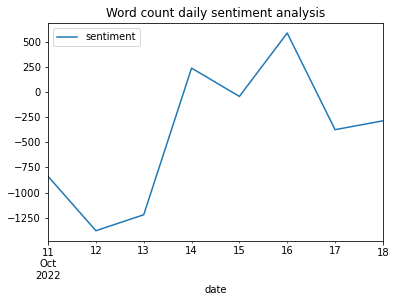

In [117]:
centiment_graph("daily", "Word count", count_lSentiment)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


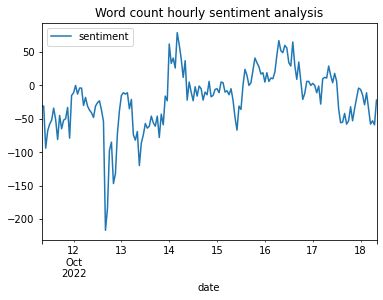

In [118]:
centiment_graph("hourly", "Word count", count_lSentiment)

In [119]:
vader_lSentiment = vaderSentimentAnalysis()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
immigrate, eu, uk, non-eu, ..., almost, entir, replac
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, joker, rule, india, …, i

franc, year, migrant, uk, benefit, third, multipl, incl, incom, school, eu, many, hous, pension, million, kid, zone, immigrate, 7m, famous, empir, far, better, need, cancel, nhs, provid, illegal, mass, war, imagin
neg: 0.229, neu: 0.628, pos: 0.143, compound: -0.5574, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
right, uk, evad, woke, move, folk, eu, back, sleepwalk, understand, current, fail, immigrate, chess, attach, piec, got, becam, toward, bori, green, social, time, issue, control, illegal
neg: 0.228, neu: 0.772, pos: 0.0, compound: -0.7964, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
give, uk, borderless, scotland, gift, gov, open, separ, much, immigrate, zone, part, compat, travel, join, member, policy, said, .., independ, cta, could, must, sturgeon, ani
neg: 0.0, neu: 0.819, pos: 0.181, c

onlinen, plenti, view, sack, immigrate, express, say, blm, arsehol, also
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
child, bradford, charg, culprit, polic, sick, man, west, offenc, district, updat, non, yorkshir, sex, death, recent, anoth
neg: 0.324, neu: 0.676, pos: 0.0, compound: -0.802, 
small, migrant, crime, rise, school, island, racist, prison, pollut, bet, hous, etc, immigrate, popul, ridden, hospit, country, full, must, illegal
neg: 0.474, neu: 0.526, pos: 0.0, compound: -0.9371, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, 

britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
savannah, lie, government, activist, …, self-proclaim, immigrate, mcmil, also, agenc, regard, heard, amber, assist
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
br

take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
alon, larg, uk, polic, thank, …, trend, immigrate, ht, shape
neg: 0.0, neu: 0.762, pos: 0.238, compound: 0.3612, 
europ, continu, destroy, uncheck, immigrate, elit, european, blood, hand
neg: 0.255, neu: 0.511, pos: 0.234, compound: -0.0772, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
uk, poverti, want, go, hous, success, program, immigrate, rout, vast, need, compo

take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
fullfact, small, impact, gain, uk, suggest, wage, studi, high-paid, distribut, worker, signific, medium, low-wag, averag, lose, immigrate, along, also
neg: 0.117, neu: 0.736, pos: 0.147, compound: 0.1779, 
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
prove, wrong, sourc, medium-high, obvious, correct, magic, low, effect, also, earner
neg: 0.366, neu: 0.634, pos: 0.0, compound: -0.6369, 
year, finish, last, …, ge, next, vote
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
small, uk, suggest, studi, oxford, wage, effect, worker, claim, stuff, labour, support, actual, low-paid, negat, immigrate, relat, research, empir, market, univers, ok, averag
neg: 0.0, neu: 0.811, pos: 0.189, compound: 0.5994, 
contract, ran, youth, award, asylum, immigrate, firm, centr, guardia

neg: 0.16, neu: 0.718, pos: 0.122, compound: -0.1779, 
pseudo, internationalist, grassroot, labour, project, support, socialist, lose, work, tori, pro-immigrate, left-w, parti, next, process, saw, continu, elect
neg: 0.126, neu: 0.748, pos: 0.126, compound: 0.0, 
agenda, reason, top, online, …, immigrate, vote, people, major, stop, mass
neg: 0.183, neu: 0.667, pos: 0.15, compound: -0.1027, 
border, never, door, uk, back, …, allow, immigrate, hard
neg: 0.151, neu: 0.645, pos: 0.204, compound: 0.128, 
border, uk, brexit, government, want, quick, win, easi, immigrate, becaus, restor, vote, people, order, migrat, lower, stop, illegal, would, ani
neg: 0.285, neu: 0.534, pos: 0.181, compound: -0.4404, 
border, uk, scotland, think, nonsens, want, utter, open, rest, immigrate, control
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
take, agre, cost, offi

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
level, oper, futur, manag, mobil, aim, organis, sponsor, hr, intend, profession, within, book, global, immigrate, suitabl, respons, system, issue, legal
neg: 0.0, neu: 0.927, pos: 0.073, compound: 0.128, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173,

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
14,600, slaveri, year, uk, criticis, crime, polic, stori, reclassifi, government, modern, ahead, across, refer, 🇧, immigrate, chariti, 📣, 🇬, case, one, decis, issue, potenti
neg: 0.149, neu: 0.851, pos: 0.0, compound: -0.5423, 
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
take, agre, cost, office, real, everi, …, sack, immigrate, home, pay, hotel, staff
neg: 0.113, neu: 0.887, pos: 0.0, compound: -0.1027, 
get, chang, uk, pandem, brexit, stubborn, inflat, ️, ukrain, climat, 🇧, ideolog, much, immigr

young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
britain, prais, show, tri, british, joker, rule, india, …, indian, allegi, say, b, origin
neg: 0.0, neu: 0.88, pos: 0.12, compound: 0.128, 
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
border, mainland, uk, may, free, think, government, ❤, europ, ️, uncontrol, ✝, amongst, eu, european, blood, pain, allow, immigrate, trauma, travel, rip, member, hand, case, control
neg: 0.188, neu: 0.554, pos: 0.258, compound: 0.3182, 
limit, chanc, take, immigrate, country, abolit, watch
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
year, finish, last, …, ge, next, vote
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
reform, britain, prais, uk, show, admit, british, tri, mis

year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, brexit, noth, …, immigrate, we'r, got, mass, weak, illegal
neg: 0.481, neu: 0.519, pos: 0.0, compound: -0.7579, 
uk, brexit, noth, …, immigrate, we'r, got, mass, weak, illegal
neg: 0.481, neu: 0.519, pos: 0.0, compound: -0.7579, 
get, btw, never, uk, brexit, noth, remoan, eu, 3rd, away, world, merkel, moan, immigrate, insan, stamped, we'r, got, superst, die, blair, weak, illegal, mass, start, 🙄
neg: 0.364, neu: 0.636, pos: 0.0, compound: -0.9001, 
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
border, possibl, uk, howev, state, scotland, noth, want,

year, uk, volit, scotland, come, everi, thousand, appli, similar, immigrate, arriv, veri, argument
neg: 0.172, neu: 0.828, pos: 0.0, compound: -0.3612, 
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
chang, shortag, stick, ahead, might, latest, catch, md, beech, immigrate, occup, plaster, option, jonathan, list, comment, possibl
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
year, rate, incom, government, approv, attempt, …, pm, p, reduc, basic, tax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
cost, uk, labour, immigrate, matter, seem, policy, public, mass, prioriti
neg: 0.0, neu: 0.891, pos: 0.109, compound: 0.0258, 
uk, refuge, aberdeen, well, although, …, shambl, meanwhitel, ‘, huge, king, meet, ok, crisi
neg: 0.0, neu: 0.577, pos: 0.423, compound: 0.6808, 
reform, visa, liz, rule, …, brav

neg: 0.0, neu: 0.772, pos: 0.228, compound: 0.7096, 
impact, uk, sheona, around, tomorrow, york, …, book, immigrate, london, area, even, launch
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
refus, extens, home, office, withdraw, spous
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport
neg: 0.199, neu: 0.616, pos: 0.185, compound: -0.0516, 
refus, extens, home, office, withdraw, spous
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
gfi
neg: 0.

young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
indi, scot, shi, document, eu, fantasi, relaunch, …, work, abandon, immigrate, join, energ, today, version, replac
neg: 0.16, neu: 0.718, pos: 0.122, compound: -0.1779, 
import, uk, dead, cheaper, live, worker, labour, let, greater, save, sign, tori, allow, immigrate, becaus, bill, new, got, valuabl, scarc, people, need, we'v, nhs, die, replac
neg: 0.223, neu: 0.571, pos: 0.207, compound: -0.3818, 
young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ignor, invest, magnitud, migrant, uk, brit, purchas, upon, reach, properti, sole, afford, white, many, arriv, net, expens, buy, caus, foreign, .., migrat, would
neg: 0.0, neu: 0.952, pos: 0.048, compound: 0.0258, 
least, honest, reform, labour, immigrate, tori, uk, support, unlimit, also
neg: 0.202, neu: 0.597, pos: 0.201,

border, migrant, manag, flow, massiv, enter, white, hous, feed, gov, serco, new, scam, make, anyth, country, migrat, profit, nobodi, stop, anoth, also
neg: 0.212, neu: 0.683, pos: 0.104, compound: -0.4588, 
reform, immigrate, uk, read, actual, policy, paul
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
higher, transpar, upper, competit, first-tier, woke, office, call, solicitor, fee, experi, wh, promis, immigrate, home, deal, court, tribun, knowledg, firm, specialist, in-depth
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
unless, general, state, scotland, push, pension, …, alreadi, pot, taxat, b, paid
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
student, direct, threat, signific, opinion, …, number, braverman, suella, ‘, intern, reduc, growt
neg: 0.248, neu: 0.657, pos: 0.095, compound: -0.4767, 
1000s, economi, transform, live, money, rais, …, treasuri, n, policy, people, boost, imagin, would
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
favorite, uk, week, nigerian, past, thin

hamid, migrant, peddler, west, mohsin, inhuman, let, win, online, cruelti, grow, nightmar
neg: 0.0, neu: 0.743, pos: 0.257, compound: 0.5859, 
british, need, immigrate, take, us, food, care, bank
neg: 0.0, neu: 0.686, pos: 0.314, compound: 0.4939, 
lead, illustr, mistak, …, immigrate, believ, far, huge, integr, mass
neg: 0.0, neu: 0.777, pos: 0.223, compound: 0.3182, 
student, direct, threat, signific, opinion, …, number, braverman, suella, ‘, intern, reduc, growt
neg: 0.248, neu: 0.657, pos: 0.095, compound: -0.4767, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
advis, simpl, cours, well, return, immigrate, game, chariti, aid, ..., .., country, system, theyr, illegal, solut, investig, origin
neg: 0.166, neu: 0.737, pos: 0.097, compound: -0.3612, 
student, direct, threat, signific, keith, opinion, growth, number, braverman, suella, ‘, intern, say, reduc, burnett
neg: 0.186, neu:

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport
neg: 0.199, neu: 0.616, pos: 0.185, compound: -0.0516, 
uk, differ, lot, broken, …, law, immigrate, 125k, make
neg: 0.307, neu: 0.693, pos: 0.0, compound: -0.4767, 
suggest, caveat, …, common, immigrate, popul, policy, age, counter
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
import, right, show, question, closest, maintain, alway, …, clear, trade, immigrate, got, ask, anyon, even, control
neg: 0.0, neu: 0.843, pos: 0.157, compound: 0.3818, 
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport
neg: 0.199, neu: 0.616, pos: 0.185, compound: -0.0516, 
favorite, uk, week, n

neg: 0.0, neu: 0.658, pos: 0.342, compound: 0.5684, 
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport
neg: 0.199, neu: 0.616, pos: 0.185, compound: -0.0516, 
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi
neg: 0.0, neu: 0.658, pos: 0.342, compound: 0.5684, 
border, noth, government, white, complet, …, contro, we'r, basic, hand, wonder, control
neg: 0.0, neu: 0.758, pos: 0.242, compound: 0.4939, 
year, finish, last, …, ge, next, vote
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport
neg: 0.199, neu: 0.616, pos: 0.185, compound: -0.0516, 
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport
neg: 0.199, neu: 0.616, pos: 0.185, compound: -0.0516, 
take, refuge, hous, …, unaccept, people, hotel, cancel, know, total, venu
neg: 0.182, neu: 0.818, pos: 0.0, compound: -0.25, 
get, uk, smooth, mean, europ, implem

britain, place, cost, uk, largest, influx, live, labour, wwii, support, term, sink, immigrate, say, iraq, intervent, parti, wors, militari, began, sinc, recess, reput, one, great, war, perhap, life
neg: 0.109, neu: 0.7, pos: 0.19, compound: 0.4404, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
lawyer, taxpay, block, government, compani, …, help, given, rwanda, flight, bbc, deport
neg: 0.199, neu: 0.616, pos: 0.185, compound: -0.0516, 
border, noth, government, white, complet, …, contro, we'r, basic, hand, wonder, control
neg: 0.0, neu: 0.758, pos: 0.242, compound: 0.4939, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
lawyer, taxp

neg: 0.0, neu: 0.516, pos: 0.484, compound: 0.7579, 
ignor, wish, thei, …, tori, toast, people
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
rat, uk, gone, government, anarchi, invas, …, street, immigrate, shit, equal
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.5574, 
border, noth, government, white, complet, …, contro, we'r, basic, hand, wonder, control
neg: 0.0, neu: 0.758, pos: 0.242, compound: 0.4939, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
rat, hope, uk, gone, government, anarchi, invas, street, immigrate, shit, equal, ani
neg: 0.218, neu: 0.606, pos: 0.176, compound: -0.1779, 
young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani
neg: 0.0, neu: 1.0, pos: 0.0, compound: 

went, take, uk, earli, employ, unpreced, eu, many, back, retir, number, seen, much, immigrate, increas, regard, left, people, sinc, full, c19, control
neg: 0.0, neu: 0.942, pos: 0.058, compound: 0.0772, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
young, man, live, hindutva, muslim, deni, peac, india, …, beg, say, mom, troubl, link, ani
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
reform, uk, prime, visa, cut, rule, …, braverman, suella, immigrate, relax, “, ”, minist, prepare, plan
neg: 0.131, neu: 0.688, pos: 0.181, compound: 0.2023, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
young, man, live, hindutva, muslim, de

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
get, took, 仕事を終わらせるのに思ったより時間がかかり大変だった, finish, uk, 1時間かかった, hour, tough, イギリスのイミグレを通過するのに約, work, immigrate, longer, expect
neg: 0.111, neu: 0.889, pos: 0.0, compound: -0.128, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
suggest, caveat, …, common, immigrate, popul, policy, age, counter
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
least, suppli, problem, come, under-suppli, attend, …, press
neg: 0.31, neu: 0.69, pos: 0.0, compound: -0.4019, 
journalist, rise, anthoni, wrote, …, work, immigrate, h, brown, caus, africa
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
reform, visa

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
pleas, search, thank, god, note, speak, …, immigrate, better, people, realiti, life
neg: 0.0, neu: 0.516, pos: 0.484, compound: 0.7579, 
managin, fink, convers, british, blackrock, government, privat, 🇧, …, larri, owner, 🇬
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ignor, wish, thei, …, tori, toast, people
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
supervisor, look, uk, usual, dubai, office, call, tri, 🔥, turkey, transit, mayb, laugh, immigrate, twice, checkpoint, part, fun, got, “, cute, ”, smile, passport, even, one, old, thailand, norway
neg: 0.0, neu: 0.64, pos: 0.36, compound: 0.9081, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax

neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
border, noth, government, white, complet, …, contro, we'r, basic, hand, wonder, control
neg: 0.0, neu: 0.758, pos: 0.242, compound: 0.4939, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
benefits-o, product, service-driven, manufacture-clos, larg, low, wage, immigrate, scale, …
neg: 0.208, neu: 0.792, pos: 0.0, compound: -0.2732, 
fundam, indi, common, …, find, ground, parti
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
govmt, chang, britain, uk, state, polic, opinion, everi, regardless, extant, de

reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
posit, target, mrs, uk, non-eu, came, brexit, may, pre, commonwealth, eu, complet, term, less, fail, immigrate, fiscal, ..., mess, tax, .., people, meet, paid, ongo, averag
neg: 0.192, neu: 0.808, pos: 0.0, compound: -0.6915, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
student, …, fta, intern, piec, migrat
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
border, noth, government, white, complet, …, contro, we'r, basic, hand, wonder, control
neg: 0.0, neu: 0.758, pos: 0.242, compound: 0.4939, 
ucu, particip, rule, made, …, keep, limit, difficult, immigrate, strike, legaci, decis
neg: 0.308, neu: 0.692, pos: 0.0, compound: -0.4588, 
never, uk, disappoint, face, acknowledg, immigrate, address, even, big, illegal, cris

fund, £, year, chang, gender, children, scotland, sea, sad, oil, undergo, joke, immigrate, popul, i'm, surgeri, use, build, grow, blueprint, north, sterl, independ, indefinit, old, unlimit, revenu, cash, snp
neg: 0.099, neu: 0.831, pos: 0.07, compound: -0.2263, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
get, onc, yeah, many, deport, …, star, less, rest, five, em, first, hotel, tuck, instinct
neg: 0.0, neu: 0.855, pos: 0.145, compound: 0.296, 
il, board, payer, enter, white, …, pulp, offer, squeez, tax, country, bed, benefit, expect
neg: 0.0, neu: 0.8, pos: 0.2, compound: 0.4588, 
⁦, resettl, larg, f, breathtak, amount, scale, …, implic, communiti, ⁩, ‘, involv, public
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
il, board, payer, enter, white, …, pulp, offer, squeez, tax, country, bed, benefit, expect
neg: 0.0, neu: 0.8, pos: 0.2, compound: 0.4588, 
cost, uk, f

train, lawyer, taxpay, block, government, money, compani, …, given, rwanda, flight, deport
neg: 0.225, neu: 0.775, pos: 0.0, compound: -0.4404, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
import, impact, uk, deal, nurs, mass, doctor
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
economi, germany, …, k, less, german, u, size, today
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
asylum, uk, first-tier, visa, may, barrist, appeal, read, …, refus, immigrate, chamber, tribun, applic, decis, abl
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
suggest, cavea

favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi
neg: 0.0, neu: 0.658, pos: 0.342, compound: 0.5684, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
expert, unlaw, hijack, …, law, oppos, activi, immigrate, conflict, interes

people, enter, relax, uk, visa, 😡
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
rent, ️how, everyon, uk, suppli, advoc, 🤦, ♂, like, well, approach, communism, work, immigrate, ‍, home, becaus, alreadi, people, country, adopt, stop, issue, mass, enough
neg: 0.083, neu: 0.679, pos: 0.238, compound: 0.4767, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
border, noth, government, white, complet, …, contro, we'r, basic, hand, wonder, control
neg: 0.0, neu: 0.758, pos: 0.242, compound: 0.4939, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
ignor, wis

neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
tran, asylum, uk, rise, lawyer, liter, i'v, told, grant, government, europ, go, back, heard, immigrate, inadvis, media, people, plan, transphobia
neg: 0.0, neu: 0.884, pos: 0.116, compound: 0.3612, 
econ, dure, uk, stay, problem, print, halt, covid, mitig, lock, govt, energi, cd, money, etc, global, immigrate, furlough, nato, tax, lower, great, war, crisi
neg: 0.267, neu: 0.608, pos: 0.125, compound: -0.5719, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, im

border, wipe, tackl, white, …, immigrate, next, elect, control, conserv
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
get, government, thing, right-w, …, immigrate, new, five, sweden, articl, tougher, environ, recent
neg: 0.0, neu: 0.866, pos: 0.134, compound: 0.1779, 
wish, get, butcherwoman, pray, zombi, uk, crime, way, suffer, immigrate, birmingham, structur
neg: 0.35, neu: 0.4, pos: 0.25, compound: -0.4588, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
reform, uk, type, brexit, problem, may, fom, support, they'v, india, less, seen, dublin, regul, immigrate, part, help, deal, respons, use, ..., ani, make, people, control, withdraw, date, also
neg: 0.082, neu: 0.755, pos: 0.163, compound: 0.4019, 
uk, specialis, visa, spous, consult, …, immigrate, migrat, first
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
problem, want, love, well, thing, whitete, money, strict, skin, alway, 

power, move, …, perform, gp, surgeri, leader, demonstr, need
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
diminish, uk, appeal, loyalist, online, number, faster, immigrate, natur, broaden, age, caus, ever, could, replac, possibl
neg: 0.0, neu: 0.787, pos: 0.213, compound: 0.4215, 
revolut, hitchen, deni, peter, thing, good, …, sexual, new, polit, parti, need, qn, whether
neg: 0.0, neu: 0.805, pos: 0.195, compound: 0.4404, 
reform, cut, set, home, immigrate, relax, rule, visa, plan, sec, truss
neg: 0.15, neu: 0.643, pos: 0.207, compound: 0.2023, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, tr

reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
revolut, hitchen, state, multicultur, power, children, deni, parent, peter, thing, good, surrend, sexual, oppos, immigrate, new, polit, parti, idea, need, qn, mass, whether, must
neg: 0.0, neu: 0.888, pos: 0.112, compound: 0.4404, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
lawyer, taxpay, block, government, money, compani, …, help, given, rwanda, 🔴, flight, deport
neg: 0.199, neu: 0.616, pos: 0.185, compound: -0.0516, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos:

bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
mini-budget, action, cours, appear, pick, cut, 🇧, lose, braverman, immigrate, best, believ, chancellor, appoint, 🇬, run, policy, genius, fight, decis, anoth, yet, truss
neg: 0.259, neu: 0.594, pos: 0.147, compound: -0.296, 
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi
neg: 0.0, neu: 0.658, pos: 0.342, compound: 0.5684, 
dover, spark, tripl, cope, new, migrant, can't, could, face, threat, crisi
neg: 0.0, neu: 0.658, pos: 0.342, compound: 0.5684, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate

neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
heavili, asylum, office, threaten, …, survivor, guardian, home, immigrate, rwanda, send, pregnant, rape
neg: 0.388, neu: 0.479, pos: 0.133, compound: -0.7003, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
favorite, uk, week, nigerian, past, thing, online, …, keep, immigrate, relax, say, process, even, gate
neg: 0.0, neu: 0.67, pos: 0.33, compound: 0.7096, 
reform, visa, liz, rule, …, braverman, suella

neg: 0.213, neu: 0.787, pos: 0.0, compound: -0.4019, 
freedom, brixet, bill, …
neg: 0.0, neu: 0.323, pos: 0.677, compound: 0.6369, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
class, perfect, can't, uk, predomin, british, rentier, damag, voter, jacob, go, rees-mogg, matur, trade, much, tori, immigrate, symbol, deal, restrict, delud, impreralist, destroy, without, averag, expect
neg: 0.186, neu: 0.701, pos: 0.113, compound: -0.34, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
rocket, commit, uk, c

hope, year, insid, uk, everyon, student, cos, visa, liter, f, econom, folk, surviv, like, us, eye, wise, depend, listen, immigrate, e, next, warn, umpteenth, choook, make, vote, king, one, time, nobodi, start, life
neg: 0.038, neu: 0.732, pos: 0.23, compound: 0.7964, 
unless, suppos, scottish, uk, labour, devolv, separ, immigrate, policy, independ
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
reform, visa, cut, rule, …, braverman, pm, suella, home, immigrate, relax, secretary, prepare, plan
neg: 0.131, neu: 0.688, pos: 0.181, compound: 0.2023, 
reform, visa, 🔥, cut, rule, home, immigrate, relax, plan, referendum, anyon, set, sec, truss
neg: 0.131, neu: 0.688, pos: 0.181, compound: 0.2023, 
bring, emeka, office, convers

reform, visa, cut, rule, …, braverman, pm, suella, home, immigrate, relax, secretary, prepare, plan
neg: 0.131, neu: 0.688, pos: 0.181, compound: 0.2023, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
reform, visa, liz, rule, …, braverman, suella, p, exclude, home, immigrate, relax, secretary, prepare, plan, truss
neg: 0.113, neu: 0.714, pos: 0.173, compound: 0.25, 
probl

stay, 🇺, cut, eu, online, …, immigrate, parti, favour, 🇪, gre, tax, major, control
neg: 0.15, neu: 0.643, pos: 0.207, compound: 0.2023, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
paper, fund, place, recours, rule, …, immigrate, subject, examin, b, control, public, famili
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
migrant, uk, fold, refuge, …, immigrate, arriv, new, research, 75,000, reveal, 240,000
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
citi, recruit, immigrate, gemini, london, privat, solicitor
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
miss, improv, condit, inspector, prison, ￼, detaine, …, report, immigrate, littl, h, case, find, held
neg: 0.329, neu: 0.671, pos: 0.0, compound: -0.5994, 
😳, wtaf
neg: 0.0, neu: 1.0, pos: 0.0,

problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
uk, net-zero, british, want, like, mayb, sure, els, pm, leg-ov, relat, immigrate, focus, much, i'm, bori, make, put, people, first, decis, stop, illegal, they'r
neg: 0.188, neu: 0.615, pos: 0.197, compound: -0.1779, 
migrant, econom, ski, like, health, …, much, 📈, believ, migrat, associ, declin, public
neg: 0.0, neu: 0.8, pos: 0.2, compound: 0.3612, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
agenda, lock, vax, con-socialist, …, de, pm, facto, believ, instal, full, mandat, swing
neg: 0.0, neu: 1.0, pos: 0.0, compo

neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, new, woe, self, sweden, vote, mass, itali, would, disord
neg: 0.246, neu: 0.754, pos: 0.0, compound: -0.7351, 
year, british, …, gave, tori, promis, major, seat
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
plenti, woke, state, thank, gone, alloc, way, thing, climat, online, immigrate, becaus, realli, emerg, far, ration, better, market, need, christ, big, leav, apart
neg: 0.0, neu: 0.795, pos: 0.205, compound: 0.6597, 
claim, guardian, asylum, 1,300, immigrate, compens, uk, seeker, phone, seiz
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
miss, improv, condit, inspector, prison, ￼, detaine, …, report, immigrate, littl, h, case, find, held
neg: 0.329, neu: 0.671, pos: 0.0, compound: -0.5994, 
problem, gove

neg: 0.0, neu: 0.761, pos: 0.239, compound: 0.296, 
boat, small, asylum, uk, unlaw, claim, officei, 1,300, rule, seeker, phone, seiz, immigrate, arriv, high, court, compens
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
uk, visa, appli, intern, sponsorship, need, certif, agreement
neg: 0.0, neu: 0.686, pos: 0.314, compound: 0.4939, 
miss, improv, condit, inspector, prison, ￼, detaine, …, report, immigrate, littl, h, case, find, held
neg: 0.329, neu: 0.671, pos: 0.0, compound: -0.5994, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
bring, sustain, jeremi, growth, online, …, hunt, help, bori, th, downfal
neg: 0.0, ne

get, plank, holiday, british, go, peter, …, tatchel, delud, .., people, albania, bypass, country, anoth
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4019, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
boat, small, asylum, uk, unlaw, 1,300, seeker, phone, …, seiz, arriv
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
vote, know, growth, online
neg: 0.0, neu: 0.536, pos: 0.464, compound: 0.3818, 
yr, uk, crime, busi, poverti, man, fuel, ppl, due, push, knee, want, labour, eu, 30k, immigrate, fall, reduc, hate, increas, anyon, tax, earn, mass, life
neg: 0.236, neu: 0.721, pos: 0.043, compound: -0.7845, 
year, uk, trust, sorri, government, day, step, asid, yes, jacob, let, end, tori, immigrate, parti, independ, rebuild, control, twelv
neg: 0.0, neu: 0.739, pos: 0.261, compound: 0.7184, 
brexit, 1.1, post, day, sabotag, dinghi, …, immigrate, diver, referendum, control, mass, 80,000
neg: 0.0, neu: 1.0, pos: 0.0, 

problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
digit, …, immigrate, id, deal, tell, ..., accept, need, public, illegal
neg: 0.254, neu: 0.563, pos: 0.183, compound: -0.25, 
take, refuge, hous, …, unaccept, people, hotel, cancel, know, total, venu
neg: 0.182, neu: 0.818, pos: 0.0, compound: -0.25, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
https, ⁦, argu, back, face, …, ⁩, home, foreign, intimid, sec, :/
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.34, 
never, fold, refuge, hous, …, braverman, immigrate, hospit, bed, stu, 240,000, stop, enough
neg: 0.167, neu: 0.833, pos: 0.0, compound: -0.296, 
take, refuge, hous, …, unaccept, people, hotel, cancel, know, total, venu
neg: 0.182, neu: 0.818, pos: 0.0, compound: -0.25, 
get, plank, holiday, british, go, peter, …, tatchel, delud, .., people, albania, bypass, country, anoth
neg

neg: 0.248, neu: 0.752, pos: 0.0, compound: -0.5106, 
visit, take, contact, uk, inconveni, visa, mean, may, hi, experienc, demand, apologis, global, immigrate, kritt, high, updat, emerg, process, veri, longer, ukvi, case
neg: 0.064, neu: 0.936, pos: 0.0, compound: -0.128, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
stand, braverman, pm, kwasi, immigrate, firm, pleas, fold
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
get, bunch, pleas, fold, government, wet, …, flannel, braverman, pm, strong, kwasi, need, one, time
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.5106, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit
neg: 0.227, neu: 0.504, pos: 0.269, compound: 0.128, 
problem, government, care, …, immigrate, welcom, increas, seem, opposit


hear, pleas, fold, power, british, government, stand, leadership, beholden, elector, pm, home, immigrate, e, secretary, foreign, kwasi, fight, firm, wef, see
neg: 0.12, neu: 0.88, pos: 0.0, compound: -0.3818, 
hope, deliv, year, terribl, uk, petrol, think, mention, past, come, etc, everi, sincer, tori, immigrate, medicin, realli, travel, pretti, emigr, better, faith, fortnight, passport, freight, crisi
neg: 0.0, neu: 0.728, pos: 0.272, compound: 0.8225, 
get, tomorrow, morn, speak, immigrate, london, policy, event, great
neg: 0.0, neu: 0.661, pos: 0.339, compound: 0.6249, 
latest, research, 👉, see
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
wipe, tackl, white, …, immigrate, next, elect, conserv, nigel, farag
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
take, refuge, hous, …, unaccept, people, hotel, cancel, know, total, venu
neg: 0.182, neu: 0.818, pos: 0.0, compound: -0.25, 
chang, year, class, uk, economi, eu, ideal, sure, exploit, built, program, work, immigrate, restrict, increa

ignor, done, uk, student, spous, think, come, money, …, lose, allow, anyon, th, pg
neg: 0.173, neu: 0.705, pos: 0.122, compound: -0.2023, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
ignor, done, uk, student, spous, think, come, money, …, lose, allow, anyon, th, pg
neg: 0.173, neu: 0.705, pos: 0.122, compound: -0.2023, 
read
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
take, bring, hubri, wage, cos, uk, job, british, malaysia, worker, cut, hi, let, reject, phillipin, immigrate, incred, moment, foreign, nurs, elect, one, low, preach, must, replac
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.7096, 
uk, altern, economi, real, government, dysfunct, falli, exist, …, stagnant, resembl, start, itali
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
cra

sourc, materi, right, say, jez
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
take, refuge, hous, …, unaccept, people, hotel, cancel, know, total, venu
neg: 0.182, neu: 0.818, pos: 0.0, compound: -0.25, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
least, investor, give, util, union, uk, woke, busi, handout, power, labour, eu, growth, minor, nationalis, unearn, spend, law, immigrate, interfer, attract, inflationari, tax, make, wast, profit, illegal, plan
neg: 0.101, neu: 0.674, pos: 0.225, compound: 0.5267, 
uk, cannot, invas, …, south, cope, infrastructur, hotel, big, troubl
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
right, uk, woke, liter, government, want, becom, tough, tori, immigrate, liber, address, lean, tax, destroy, people, country,

look, eventu, air, …, surpris, drain, immigrate, scam, process, bbc
neg: 0.316, neu: 0.684, pos: 0.0, compound: -0.5719, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
last, coupl, week, noth, …, seen, tori, short, disast, parti, lost, control
neg: 0.187, neu: 0.813, pos: 0.0, compound: -0.3182, 
take, refuge, hous, …, unaccept, people, hotel, cancel, know, total, venu
neg: 0.182, neu: 0.818, pos: 0.0, compound: -0.25, 
take, refuge, hous, …, unaccept, people, hotel, cancel, know, total, venu
neg: 0.182, neu: 0.818, pos: 0.0, compound: -0.25, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
decad, never, uk, prime, globalist, incompet, pms, noth, whit

neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
digit, …, immigrate, id, deal, tell, ..., accept, need, public, illegal
neg: 0.254, neu: 0.563, pos: 0.183, compound: -0.25, 
visit, take, contact, uk, inconveni, visa, mean, may, parshva, hi, experienc, demand, apologis, global, immigrate, high, updat, emerg, process, veri, longer, ukvi, case
neg: 0.064, neu: 0.936, pos: 0.0, compound: -0.128, 
malcolm, union, power, worker, avtar, organis, …, jandiala, indian, rest, trade, smethwick, jouhl, associ, singh
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, brexit, slump, go, fault, eu, remoan, trade, immigrate, compar, “, ”, foreign, gdp, led
neg: 0.184, neu: 0.816, pos: 0.0, compound: -0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
digit, …, immigrate, id, deal, tell, ..., accept, need, public, illegal
neg: 0.254, neu: 0.563, pos: 0.183, compound: -0.25, 
reform, cut, rule, …, b

neg: 0.084, neu: 0.613, pos: 0.303, compound: 0.6908, 
lockdown, globalist, vaccin, eu, …, immigrate, pro, fo, devast, plan
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, altern, economi, real, government, dysfunct, falli, exist, …, stagnant, resembl, start, itali
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bn, £, mad, earn, stop, 1.9
neg: 0.643, neu: 0.357, pos: 0.0, compound: -0.6597, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
visit, requir, mark-bel, crimin, carlisl, call, solicitor, base, modern, properti, local, cover, rang, defenc, law, wragg, immigrate, home, matter, broad, firm, famili, legal, possibl, servic
neg: 0.0, neu: 0.898, pos: 0.102, compound: 0.1531, 
uk, altern, economi, real, government, dysfunct, falli, exist, …, stagnant, resembl, start, itali
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
never, uk, came, can't, cyprus, british, claim, parent, alway, coloni, cope, 50s

look, eventu, air, …, surpris, drain, immigrate, scam, process, bbc
neg: 0.316, neu: 0.684, pos: 0.0, compound: -0.5719, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
look, eventu, air, …, surpris, drain, immigrate, scam, process, bbc
neg: 0.316, neu: 0.684, pos: 0.0, compound: -0.5719, 
slaveri, year, uk, government, modern, half, referr, genuin, white, conclud, confirm, first, author
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
boat, decad, uk, can't, stuck, us, they'v, …, immigrate, intern, tell, con, stop, they'r, mass
neg: 0.138, neu: 0.753, pos: 0.109, compound: -0.1179, 
look, incompet, upon, utter, leadership, decid, …, electio, immedi, leader
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
reform, steal, young, can't, woke, howev, u

crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
uk, busi, liter, three-quart, shortag, labour, harsh, …, –, immigrate, help, proof, policy, struck
neg: 0.295, neu: 0.542, pos: 0.163, compound: -0.296, 
japa, uk, germa, fear, question, aussi, us, …, immigrate, ask, either, people, diaspora
neg: 0.225, neu: 0.775, pos: 0.0, compound: -0.4939, 
sue, border, inform, tactic, session, conlan, …, nation, immigrate, present, act
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
£, cost, taxpay, office, line, detent, us, harder, million, …, flood, home, immigrate, reopen, centr
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
wish, walk, uk, boiler, oper, becom, hijack, certain, gas, fals, flag, immigrate, express, liber, net, membership, reduc, prosper, increas, vote, car, people, zero, conserv, prohibit
neg: 0.0, neu: 0.827, pos: 0.173, compound: 0.5859, 
visit, onlinen, cv, financi, store, document, com

small, propo, prison, detaine, although, …, immigrate, compris, veri, continu, country, held
neg: 0.248, neu: 0.752, pos: 0.0, compound: -0.5106, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, reach, want, consult, dream, 🇧, 🤔, reliabl, fulfil, immigrate, best, destin, 🇬, firm, great
neg: 0.0, neu: 0.355, pos: 0.645, compound: 0.8934, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
awa, uk, purchas, b4, many, prior, long, …, serco, mp, wonder, contract, share, find
neg: 0.0, neu: 0.845, pos: 0.155, compound: 0.296, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
sunak, done, get, general, uk, level, brexit, call, god, liz, cut, want, experi, us, elector, pm, oust, fail, ge2019, to

awa, uk, purchas, b4, many, prior, long, …, serco, mp, wonder, contract, share, find
neg: 0.0, neu: 0.845, pos: 0.155, compound: 0.296, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
get, bunch, pleas, fold, government, wet, …, flannel, braverman, pm, strong, kwasi, need, one, time
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.5106, 
get, charg, uk, crime, show, urself, exampl, whitete, wit, everi, dispens, work, immigrate, non, u, use, wors, hate, longer, involv, chanc, play, must
neg: 0.252, neu: 0.664, pos: 0.084, compound: -0.7003, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
specialis, debt, call, fine, free, offenc, judgement, consult, motor, initi, counti, immigrate, leas, court, individu, derbi, case, need, tailor, stretton, recoveri, legal, servic
neg: 0.089, neu: 0.676, pos: 0.

crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
get, bunch, pleas, fold, government, wet, …, flannel, braverman, pm, strong, kwasi, need, one, time
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.5106, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
awa, uk, purchas, b4, many, prior, long, …, serco, mp, wonder, contract, share, find
neg: 0.0, neu: 0.845, pos: 0.155, compound: 0.2

leaf, take, uk, carlson, tucker, everi, good, …, book, immigrate, policy, owner, make, hotel, john, mappin
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4404, 
leaf, take, uk, carlson, tucker, everi, good, …, book, immigrate, policy, owner, make, hotel, john, mappin
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4404, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
look, office, threaten, inhuman, quit, …, soft, immigrate, home, stagger, make, bnp, 👉, griffin
neg: 0.191, neu: 0.809, pos: 0.0, compound: -0.3818, 
leaf, take, uk, carlson, tucker, everi, good, …, book, immigrate, policy, owner, make, hotel, john, mappin
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4404, 
awa, uk, purchas, b4, many, prior, long, …, serco, mp, wonder, contract, share, find
neg: 0.0, neu: 0.845, pos: 0.155, compound: 0.296, 
domest, slaveri, treat, mo, modern, …, immigrate, primarili, major, issue, wrong
neg: 0.

onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong
neg: 0.22, neu: 0.78, pos: 0.0, compound: -0.4767, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
wi

inc, uk, forc, father, mother, labour, like, many, govt, dreamt, …, braverman, “, ”, leav, kenya
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.3612, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
hope, attitud, enterpris, may, think, liz, odd, growth, pm, home, immigrate, secretary, toward, closer, write, enemi, truss
n

neg: 0.0, neu: 0.845, pos: 0.155, compound: 0.296, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
worst, right, uk, mention, violat, govt, way, bangladesh, india, minor, rank, human, immigrate, pakistan, u, altogeth, logic, one, democraci, stop, shld, index
neg: 0.249, neu: 0.751, pos: 0.0, compound: -0.743, 
crackdown,

wish, journey, uk, luck, malta, latvia, visa, studi, australia, 🇦, want, go, many, germany, safeway, good, sukhmanjot, . 
.
.
., immigrate, new, congratul, canada, zealand, ..., abroad, 📚, singh, 🇨
neg: 0.0, neu: 0.669, pos: 0.331, compound: 0.836, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
resettl, year, uk, usual, direct, accord, june, fold, scheme, 4,200, refuge, comparison, special, research, annual, rise, “, ”, group, 240,000, repres, averag
neg: 0.0, neu: 0.876, pos: 0.124, compound: 0.4019, 
crowd, uk, live, well, bet, 3rd, away, world, begin, i'll, immigrate, home, chariti, consequ, mansion, country, gate
neg: 0.0, neu: 0.884, pos: 0.116, compound: 0.2732, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
immigrate, migrat, uk, 240,000, research, fold, show, watch, refuge, news

crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.136, neu: 0.68, pos: 0.184, compound: 0.1779, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
crackdown, regim, figure, …, women, help, widespread, key, launch, prot, led, cloth
neg: 0.0, neu: 0.787, pos: 0.213, compound: 0.4019, 
migrant, uk, expos, fold, show, refuge, news, watch, immigrate, research, ..., concern, horror, migrat, 240,000, investig, also
neg: 0.188, neu: 0.812, pos: 0.0, compound: -0.5719, 
crackdown, regim, figure, …, women, help, widespread, key, iranian, pro, launch, led, cloth
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
immigrate, migrat, uk, 240,000, research, fold, show, watch, refuge, news
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
immigrate, migrat, 240,000, research, fold, show, watch, refuge
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
crackdown, 

chang, terribl, direct, liz, back, bind, …, less, mode, bold, market, panic, 🗣, announc, truss
neg: 0.199, neu: 0.662, pos: 0.14, compound: -0.2449, 
crackdown, prote, regim, figure, …, new, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.0, neu: 0.816, pos: 0.184, compound: 0.4019, 
crackdown, prote, regim, figure, …, new, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.0, neu: 0.816, pos: 0.184, compound: 0.4019, 
leaf, take, uk, carlson, tucker, everi, good, …, book, immigrate, policy, owner, make, hotel, john, mappin
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4404, 
crackdown, prote, regim, figure, …, new, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.0, neu: 0.816, pos: 0.184, compound: 0.4019, 
crackdown, prote, regim, figure, …, new, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.0, neu: 0.816, pos: 0.184, compound: 0.4019, 
posit, receiv, ban, novak, admit, open, outcri, …, thought, law, immigrate, aus, d

reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
get, bunch, pleas, fold, government, wet, …, flannel, braverman, pm, strong, kwasi, need, one, time
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.5106, 
uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, new, woe, self, sweden, vote, mass, itali, would, disord
neg: 0.246, neu: 0.754, pos: 0.0, compound: -0.7351, 
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.136, neu: 0.68, pos: 0.184, compound: 0.1779, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
slaveri, office, reclassifi, modern, spoof, away, …, home, immigrate, fool, issue, illegal
neg: 0.419, neu: 0.581, pos: 0.0, compound: -0.7579, 
hope, uk, payment, month, fee, 2022-20

higher, uk, …, popul, hand, tax, country, prepare, traitor, increa, must
neg: 0.0, neu: 0.738, pos: 0.262, compound: 0.4939, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
heavili, asylum, beyond, office, white, threaten, survivor, disgust, guardian, tori, home, immigrate, rape, rwanda, wonder, send, pregnant, detest, ani
neg: 0.39, neu: 0.523, pos: 0.087, compound: -0.8658, 
slaveri, office, reclassifi, modern, spoof, away, …, home, immigrate, fool, issue, illegal
neg: 0.419, neu: 0.581, pos: 0.0, compound: -0.7579, 
heavili, asylum, office, threaten, survivor, guardian, home, immigrate, rwanda, send, pregnant, rape
neg: 0.388, neu: 0.479, pos: 0.133, compound: -0.7003, 
slaveri, office, reclassifi, modern, spoof, away, …, home, immigrate, fool, issue, illegal
neg: 0.419, neu: 0.581, pos: 0.0, compound: -0.7579, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, r

uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, new, woe, self, sweden, vote, mass, itali, would, disord
neg: 0.246, neu: 0.754, pos: 0.0, compound: -0.7351, 
uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, new, woe, self, sweden, vote, mass, itali, would, disord
neg: 0.246, neu: 0.754, pos: 0.0, compound: -0.7351, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, new, woe, self, sweden, vote, mass, itali, would, disord
neg: 0.246, neu: 0.754, pos: 0.0, compound: -0.7351, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
uk, hold, boomer, online, work, immigrate, ..., l, instead, crisi, enough
neg: 0.0, neu: 1.0, pos: 0.0, compound:

scandal, uk, us, …, report, someth, immigrate, indentur, servitud
neg: 0.293, neu: 0.707, pos: 0.0, compound: -0.4404, 
report, home, confus, behind, migrant, delay, unnecessarili, bar, find, office, keep
neg: 0.187, neu: 0.813, pos: 0.0, compound: -0.3182, 
0207 101 4682, busi, direct, call, barrist, mediat, properti, civil, accredit, disput, qualifi, law, handl, litig, immigrate, hire, matter, stephani, london, heijdra, famili
neg: 0.0, neu: 0.952, pos: 0.048, compound: 0.0258, 
year, uk, visa, million, …, immigrate, one, issue, unlimit, migrati
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
uk, bus, liter, headlin, government, astonishin, read, …, shriek, reprehens, launch
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
read
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
communiti, immigrate, anti, uk, gaslight, polit, climat, mayhem, ongo, indian
neg: 0.204, neu: 0.796, pos: 0.0, compound: -0.31

scienc, stanc, immigrate, firm, uk, risk, hard-lin, exodus
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.2732, 
three, offenc, charg, imprison, carri, sentenc, deport, block, jamaica, life
neg: 0.244, neu: 0.756, pos: 0.0, compound: -0.4404, 
migrant, unnecessarili, bar, office, behind, …, keep, report, home, ht, delay, find, confus
neg: 0.173, neu: 0.827, pos: 0.0, compound: -0.3182, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
situat, uk, unwit, approach, iran, …, imm, end, true, could, someon, flee
neg: 0.0, neu: 0.781, pos: 0.219, compound: 0.4215, 
resid, uk, lift, πίνει, claim, ihrc, γιάννης, access, immigrate, help, restrict, ..., near, irregular, arm, obtain, κερνάει, people, απίστευτο, benefit, legal, status
neg: 0.094, neu: 0.647, pos: 0.259, compound: 0.5574, 
higher, migrant, uk, rate, base, employ, unemploy, well, they'v, high, immigrate, birmingham, manufactur

night, last, …, tori, opportun, say, given, policy, repres, detest
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
uk, wage, level, labour, go, hous, million, shrink, keep, tori, immigrate, price, popul, nativ, infrastructur, capac, illegal, deport
neg: 0.175, neu: 0.825, pos: 0.0, compound: -0.5574, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg

crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.136, neu: 0.68, pos: 0.184, compound: 0.1779, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
fta, deadlin, concern, immigrate, meet, canindia, diwali, may, india-uk, news
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
night, last, …, tori, opportun, say, given, policy, repres, detest
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong
neg: 0.22, neu: 0.78, pos: 0.0, compound: -0.4767, 
direct, call, barrist, brighton, avail, civil, 020 3026, offenc, local, hous, motor, rang, disput, landlord, law, handl, litig, access, immigrate, matter, chamber, london, birmingham, hill, includ, famili, legal, tenant
neg: 0.0, neu: 0.912, pos: 0.088, compound: 0.1531, 
poor, yr, fund, 50k, uk, brexit, ac

leaf, take, uk, carlson, tucker, everi, good, …, book, immigrate, policy, owner, make, hotel, john, mappin
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4404, 
slaveri, uk, suggest, crime, office, reclassifi, modern, victim, braverman, suella, home, immigrate, game, prioritis, ..., depart, “, ”, longer, people, system, issue, illegal, doubl
neg: 0.326, neu: 0.674, pos: 0.0, compound: -0.8481, 
posit, articl, read, indian, see, government
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
leaf, take, uk, carlson, tucker, everi, good, …, book, immigrate, policy, owner, make, hotel, john, mappin
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4404, 
posit, fact, nigerian, anybodi, …, meanwhitel, work, say, would
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
leaf, take, uk, carlso

truli, disgust, individu, …, beyond, hardwork, government
neg: 0.438, neu: 0.562, pos: 0.0, compound: -0.5994, 
night, last, …, tori, opportun, say, given, policy, repres, detest
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
design, uk, risk, bail, bad, come, go, deter, ankl, perform, immigrate, stigmatis, punish, policy, gps, anyon, people, tag, die
neg: 0.462, neu: 0.538, pos: 0.0, compound: -0.9169, 
year, beyond, british, valu, government, truli, past, want, support, demand, disgust, individu, tradit, people, stop, hardwork, illegal
neg: 0.427, neu: 0.42, pos: 0.153, compound: -0.802, 
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.136, neu: 0.68, pos: 0.184, compound: 0.1779, 
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.136, neu: 0.68, pos: 0.184, compound: 0.1779, 
crackdown, protest, regim, figure, …, women, help, widespread, key, iranian, launch, led, cloth
neg: 0.

prove, multicultur, muslim, riot, town, million, …, citi, pm, work, immigrate, th, blair, coax
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
uk, underfund, noth, government, fault, million, less, immigrate, run, people, nhs, realis, strain, servic
neg: 0.245, neu: 0.755, pos: 0.0, compound: -0.4404, 
colleagu, reclassif, concern, danger, deepli, …, challeng, thought
neg: 0.362, neu: 0.638, pos: 0.0, compound: -0.5267, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
least, decad, polaris, clickbait, discu, tv, radio, divis, …, hyster, rhetor, page, polit, front
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
least, decad, polaris, clickbait, discu, tv, radio, divis, …, hyster, rhetor, page, polit, front
neg: 0.0, neu: 1.0, pos: 0.0, compoun

reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
night, last, …, tori, opportun, say, given, policy, repres, detest
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
arrest, …, immigrate, best, rich, issue, echelo, illegal, start, hey
neg: 0.319, neu: 0.266, pos: 0.415, compound: 0.4215, 
place, train, student, 👇, cours, want, ukcisa, book, immigrate, new, you'r, ❓, next, join, member, rout, refresh, need, find, whether
neg: 0.0, neu: 0.821, pos: 0.179, compound: 0.3612, 
onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong
neg: 0.22, neu: 0.78, pos: 0.0, compound: -0.4767, 
law, book, immigrate, contact, us, advic, signpost, appoint, solicitor
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0

secur, pleas, uk, power, rate, nonsens, inflat, energi, focus, immigrate, food, generat, drop, issue
neg: 0.139, neu: 0.861, pos: 0.0, compound: -0.2732, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue
neg: 0.0, neu: 0.755, pos: 0.245, compound: 0.3818, 
uk, economi, government, inevit, content, …, still, moment, trash, undo, wtf
neg: 0.297, neu: 0.703, pos: 0.0, compound: -0.5859, 
take, busi, labour, …, demand, answer, mp, lobbi, .., translat, big, cheap
neg: 0.13, neu: 0.87, pos: 0.0, compound: -0.128, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
night, last, …, tori, opportun, say, given, policy, repres, detest
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
fill, give, themselv, uk, taxpay, job, free, dentist, live, come, hous, support, money, 

wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong
neg: 0.22, neu: 0.78, pos: 0.0, compound: -0.4767, 
uk, day, white, reason, tweet, …, understand, seci, home, hate, mandem, someon
neg: 0.27, neu: 0.73, pos: 0.0, compound: -0.5719, 
cousin, bring, uk, man, go, whitete, world, kid, immigrate, ..., welcom, spot, scrounger, illegal, african, legal
neg: 0.188, neu: 0.733, pos: 0.079, compound: -0.4767, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos

tragic, year, sever, mental, detent, almost, man, stori, prison, online, return, section, immigrate, purpos, veri, hmip, hospit, whose, spoke, includ, ill, held
neg: 0.317, neu: 0.683, pos: 0.0, compound: -0.8332, 
poor, excess, dearth, sluggish, period, detain, protect, detent, vulner, prison, many, support, care, gov, found, qualiti, report, publish, immigrate, damn, advic, decision-mak, people, lack, legal
neg: 0.457, neu: 0.317, pos: 0.226, compound: -0.8807, 
import, detain, prison, …, report, immigrate, new, purpos, use, people, find
neg: 0.433, neu: 0.567, pos: 0.0, compound: -0.7269, 
altogeth, 🤣
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
onc, deepli, office, senseless, live, …, home, prioritis, cruelti, instead, people, also, wrong
neg: 0.22, neu: 0.78, pos: 0.0, compound: -0.4767, 
whomev, establish, uk, wage, british, pirat, open, hr, romer, sl

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
least, https, uk, freeport, move, modern, …, within, popul, say, ..., interest, slave, entir, would
neg: 0.0, neu: 0.812, pos: 0.188, compound: 0.4588, 
multicultur, bilderberg, safe, un, us, blood, …, street, c, fail, ccp, wef, feel, ani
neg: 0.213, neu: 0.61, pos: 0.177, compound: -0.1531, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
least, https, uk, freeport, move, modern, …, within, popul, say, ..., interest, slave, entir, would
neg: 0.0, neu: 0.812, pos: 0.188, compound: 0.4588, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue
neg: 0.0, neu: 0.755, p

boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
uk, economi, approv, voter, …, perform, disapprov, wall, policy, gov't, blue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
uk, day, white, reason, tweet, …, understand, seci, home, hate, mandem, someon
neg: 0.27, neu: 0.73, pos: 0.0, compound: -0.5719, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue
neg: 0.0, neu: 0.755, pos: 0.245, compound: 0.3818, 
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue
neg: 0.0, neu: 0.755, pos: 0.245, compound: 0.

distinct, small, prison, experi, proport, read, face, detaine, although, review, immigrate, popul, compris, veri, continu, country, themat, held, challeng
neg: 0.155, neu: 0.845, pos: 0.0, compound: -0.5106, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
least, year, migrant, uk, cross, came, wipe, 35,000, enter, white, many, dinghi, sunday, immigrate, next, 1,065, channel, rout, far, elect, illegal, conserv, french, assist
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.5574, 
slaveri, office, reclassifi, talk, modern, white, …, home, immigrate, wonder, issue, illegal, also
neg: 0.247, neu: 0.753, pos: 0.0, compound: -0.5574, 
…
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue
neg: 0.0, neu: 0.755, pos: 0.245, compound: 0.3818, 
slaveri, office, reclassifi, talk, modern, white, …, home, immigrate

neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
slaveri, fundament, reclassifi, safeguard, modern, online, …, immigrate, home, issue
neg: 0.0, neu: 0.755, pos: 0.245, compound: 0.3818, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
import, uk, line, view, laid, glad, racist, touchi, critic, india, automat, everi, indian, within, fta, immigrate, matter, negoti, policy, especi, red, entitl, issue
neg: 0.209, neu: 0.651, pos: 0.14, compound: -0.4588, 
uk, ban, muslim, white, …, council, say, halal, country, even, leav, coun, would
neg: 0.247, neu: 0.753, pos: 0.0, compound: -0.5574, 
slaveri, uk, accord, children, barbar, modern, cruella
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, day, white, reason, tweet, …, understand, seci, home, hate, mandem, someon
neg: 0.27, neu: 0.73, pos: 0.0, compound: -0.5719, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, 

modern, slaveri, home, immigrate, issue, office, illegal, reclassifi
neg: 0.34, neu: 0.66, pos: 0.0, compound: -0.5574, 
modern, slaveri, home, immigrate, issue, office, illegal, reclassifi
neg: 0.34, neu: 0.66, pos: 0.0, compound: -0.5574, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
modern, slaveri, home, immigrate, issue, office, illegal, reclassifi
neg: 0.34, neu: 0.66, pos: 0.0, compound: -0.5574, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos

dont, chang, doesnt, uk, dumb, rate, finit, valu, pretend, reach, print, amount, yes, like, fiat, back, support, everi, birth, nation, much, capit, immigrate, fall, popul, u, market, drop, country, gdp, failur, peak, replac
neg: 0.087, neu: 0.622, pos: 0.291, compound: 0.8021, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
reform, cut, rule, …, braverman, pm, suella, tori, immigrate, relax, mps, exc, concern, prepare, plan
neg: 0.124, neu: 0.706, pos: 0.171, compound: 0.2023, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
uk, impecc, civil, experi, us, …, ambassador, cross-bench, peer, servant, reput, former
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
reform, cut, rule, …, braverman, pm, suella, tori, 

get, poor, border, take, mrs, uk, person, vet, may, sw1a, forc, think, eu, reason, back, etc, success, immigrate, warn, enough, blob, major, remain, decis, know
neg: 0.149, neu: 0.728, pos: 0.123, compound: 0.0516, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
give, prevent, uk, detain, mean, suffer, return, law, immigrate, becaus, damn, anymor, mess, people, order, even, system, nobodi, control, elig
neg: 0.417, neu: 0.543, pos: 0.04, compound: -0.886, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
reform, sun, visa, cut, rule, braverman, pm, suella, immigrate, relax, ..., prepare, plan
neg: 0.131, neu: 0.688, pos: 0.181, compound: 0.2023, 
uk, amidst, officei, …, excl, braverman, fta, seci, uncertainti, immigrate, home, say, comment, setback
neg: 0.0, neu: 1.0, pos: 0.0, compoun

boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
least, loophol, gov, …, billion, law, feder, use, greg, oversight, abbott, texa, insuffici, ensur
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
⁦, reform, serious, vi

uk, rate, fallen, …, birth, sinc, b
neg: 0.385, neu: 0.615, pos: 0.0, compound: -0.3612, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth
neg: 0.348, neu: 0.57, pos: 0.082, compound: -0.6369, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.13

quantit, uk, problem, economi, econom, invers, british, capita, 1997/2004, per, proport, shrink, zone, immigrate, disast, sinc, social, gdp, mass
neg: 0.13, neu: 0.87, pos: 0.0, compound: -0.4019, 
take, cost, uk, job, free, noth, online, trade, immigrate, true, deal, benefit, would
neg: 0.0, neu: 0.524, pos: 0.476, compound: 0.8442, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
decad, improv, head, uk, incom, product, per, …, lo, drug, yet, ani
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, artist, visa, block, tri, naija, circumv, till, probabl, hit, immigrate, crossov, stumbl, wonder, issue, abl
neg: 0.162, neu: 0.838, pos: 0.0, compound: -0.4404, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0

serious, liberalis, uk, government, priorit, go, regim, growth, …, immigrate, one, ani
neg: 0.101, neu: 0.698, pos: 0.202, compound: 0.3182, 
inspir, visual, overview, percept, …, data, polit, n, public
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
year, cost, x, week, come, per, us, million, money, parasit, thousand, groom, immigrate, unwil, help, people, could, stop, illegal, lost
neg: 0.314, neu: 0.581, pos: 0.105, compound: -0.6597, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
small, asylum, nice, tri, day, seeker, everi, though, immigrate, deal, given, ..., fraction, one
neg: 0.0, neu: 0.823, pos: 0.177, compound: 0.4215, 
get, noth, gover

fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
britain, uk, busi, around, europ, boom, …, serco, work, immigrate, outlook, boost, profit, benefit
neg: 0.0, neu: 0.538, pos: 0.462, compound: 0.8225, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
wipe, tackl, white, immigrate, say, next, “, ”, elect, conserv, nigel, farag
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero
neg: 0.0, n

migrant, uk, condit, inward, movement, dynam, reach, scrap, freedom, labour, resurrect, eu, term, align, im, limit, much, short, immigrate, hard, outsid, singl, address, market, ukca, rotw, regulatori, possibl
neg: 0.044, neu: 0.789, pos: 0.167, compound: 0.5994, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth
neg: 0.348, neu: 0.57, pos: 0.082, compound: -0.6369, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
situat, give, £, crazi, government, …, taxpa, offer, 50m, solut, anoth, yet, truss
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
decad, larg, talent, uk, us, germany, outflow, scale, …, inventor, russia, also
neg: 0.0, neu: 0.781, pos: 0.219, compound: 0.4215, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, pro

chang, terribl, direct, liz, back, bind, …, less, mode, bold, market, panic, 🗣, announc, truss
neg: 0.199, neu: 0.662, pos: 0.14, compound: -0.2449, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
secur, right, bu, uk-india, deepen, …, trade, worth, home, express, deal, secretary, concern, co-oper
neg: 0.0, neu: 0.863, pos: 0.137, compound: 0.2263, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
visa, many, alway, …, depend, indian, trade, deal, citizen, paradox, provid
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
situat, give, £, crazi, g

boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
chang, britain, everyon, forgot, wipe, tackl, labour, open, landscap, tori, immigrate, floodgat, ever
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 

neg: 0.0, neu: 0.724, pos: 0.276, compound: 0.6369, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
elect, immigrate, white, next, wipe, conserv, tackl
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
boat, small, cross, british, money, …, fail, deal, believ, reduc, rwanda, people, wast, public
neg: 0.226, neu: 0.774, pos: 0.0, compound: -0.5423, 
boat, le

boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
chang, terribl, direct, liz, back, bind, …, less, mode, bold, market, panic, 🗣, announc, truss
neg: 0.199, neu: 0.662, pos: 0.14, compound: -0.2449, 
onc, get, cost, uk, brit, whenev, government, cut, civil, white, hous, face, etc, g, spend, immigrate, e, abolish, aid, sector, foreign, servant, need, control, public, benefit, legal
neg: 0.073, neu: 0.769, pos: 0.157, compound: 0.34, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
boat, least, small, year, migrant, uk, cross, 35,000, enter, sunday, …, 1,065, channel, illegal
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5574, 
boat, least, 

boarder, scottish, uk, folk, glad, want, racist, parent, back, support, gov, kick, england, see, immigrate, turf, extradit, rwanda, born, policy, 😁, ship, goose-stepp
neg: 0.138, neu: 0.621, pos: 0.241, compound: 0.25, 
wipe, tackl, white, …, number, immigrate, next, arr, elect, conserv, nigel, farag
neg: 0.0, neu: 0.885, pos: 0.115, compound: 0.0772, 
shine, detent, …, immigrate, shock, help, join, light, system
neg: 0.208, neu: 0.4, pos: 0.392, compound: 0.3182, 
uk, passion, talk, commonwealth, …, contrast, politician, hilari, conserv
neg: 0.0, neu: 0.7, pos: 0.3, compound: 0.4588, 
shine, detent, …, immigrate, shock, help, join, light, system
neg: 0.208, neu: 0.4, pos: 0.392, compound: 0.3182, 
get, owe, uk, may, fuel, india-uk, final, fta, negoti, increas, concern, delay, unlik
neg: 0.161, neu: 0.839, pos: 0.0, compound: -0.3182, 
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
fact, uk, think, base, island, …,

valid, pleas, uk, bu, stuck, digit, fault, india, …, immigrate, mine, help, without, ani
neg: 0.27, neu: 0.575, pos: 0.155, compound: -0.25, 
uk, passion, talk, commonwealth, …, contrast, politician, hilari, conserv
neg: 0.0, neu: 0.7, pos: 0.3, compound: 0.4588, 
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, passion, talk, commonwealth, …, contrast, politician, hilari, conserv
neg: 0.0, neu: 0.7, pos: 0.3, compound: 0.4588, 
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, passion, talk, commonwealth, …, contrast, politician, hilari, conserv
neg: 0.0, neu: 0.7, pos: 0.3, compound: 0.4588, 
shit, full, you'r
neg: 0.643, neu: 0.357, pos: 0.0, compound: -0.5574, 
higher, invest, year, overal, uk, rate, safe, sudden, cours, massiv, like, experi, hous, money, etc, wealth, birth, demand, divid, immigrate, price, given, pretti, grow, steadi, f

becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
uk, british, invad, royal, …, law, immigrate, tougher, america, need, famili, repres
neg: 0.0, neu: 0.855, pos: 0.145, compound: 0.1779, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
uk, episod, thank, europ, subject, huge
neg: 0.0, neu: 0.455, pos: 0.545, compound: 0.5859, 
crackdown, base, regim, figure, …, women, help, key, launch, director, cloth
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.4019, 
crackdown, base, regim, figure, …, women, help, key, launch, director, cloth
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.4019, 
visit, year, young, uk, 🌐, 👇, websit, ten, detail, rather, settlement, brought, appli, immigrate, five, born, people, without, status
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oppos, home, immigrate, uk, secretary, india, origin, indian
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
becom, immigrate, uk, illegal, problem

larg, union, suppli, uk, brexit, mean, shortag, government, worker, difficulti, labour, european, 🇧, timber, thier, hostil, home, immigrate, chain, construct, 🇬, policy, put, sinc, country, decis, stop, obstacl
neg: 0.081, neu: 0.919, pos: 0.0, compound: -0.296, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
miss, inform, session, come, like, octob, sign, still, you'v, got, lunchtim, 19th, today, one, time, great, would
neg: 0.072, neu: 0.631, pos: 0.297, compound: 0.7184, 
braverman, get, ignor, mps, coward, immigrate, author, say, tough, must, …
neg: 0.36, neu: 0.64, pos: 0.0, compound: -0.5423, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
uk, nigerian, want, rule, strict, …, immigrate, join, country, find, tha
neg: 0.0, neu: 0.696, pos: 0.304, compound: 0.3612, 
shit, full, you'r
neg: 0.643, neu: 0.357, pos: 0.0, compound: -0.5574, 
shit, full, you'r
neg: 0.643, neu: 0.357, pos: 0.0, comp

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
lazi, year, lawyer, office, problem, excus, coward, still, immigrate, court, policy, hand, foreign, left, campaign, country, anoth, conserv
neg: 0.238, neu: 0.628, pos: 0.134, compound: -0.3612, 
uk, economi, rate, briton, approv, octob, …, disapprov, pan, immigrate, policy, ):, gov't, nhs
neg: 0.189, neu: 0.811, pos: 0.0, compound: -0.4215, 
oppos, home, immigrate, uk, secretary, india, origin, indian
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
oppos, home, immigrate, uk, secretary, india, origin, indian
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oppos, home, immigrate, uk, secretary, india, origin, indian
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oppos, home, immigrate, uk, secretary, india, origin, indian
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bma,

friend, embarrass, shift, happen, period, uk, 5.5, oper, benefit, morn, t4, hour, enter, claim, 6/38, many, desk, work, immigrate, wait, ..., accept, lhr, time, collect, total
neg: 0.067, neu: 0.667, pos: 0.267, compound: 0.765, 
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth
neg: 0.348, neu: 0.57, pos: 0.082, compound: -0.6369, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
becom, immigrate, uk, illegal, problem
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
secur, engin, right, liberalis, uk, immigrateation-fuel, post-brexit, sustain, uk-india, deepen, growth, trade, worth, home, express, immigrate, deal, secretary, concern, avoid, system, co-oper, must
neg: 0.082, neu: 0.749, pos: 0.169, compound: 0.3182, 
uk, economi, econom, immigrate, becaus, net, whether, know,

neg: 0.492, neu: 0.508, pos: 0.0, compound: -0.8271, 
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth
neg: 0.348, neu: 0.57, pos: 0.082, compound: -0.6369, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
state, untrust, worker, eas, rule, …, report, braverman, pm, suella, ‘, sidelin, foreign, order
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
valid, never, pleas, uk, office, airlin, stuck, deni, want, digit, fault, india, gave, immigrate, home, check, becaus, mine, help, card, without, physic, ani
neg: 0.17, neu: 0.686, pos: 0.144, compound: -0.1779, 
brexit, mean, told, cours, worker, want, white, eu, harder, made, costlier, return, much, longer, except, leav, could, someon, explain, stupid, see
neg: 0.143, neu: 0.802, pos: 0.055, compound: -0.476

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
franc, asylum, uk, suggest, officei, …, immigrate, n, process, 29/11, request, french
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
differ, brexit, free, two, …, braverman, trade, global, immigrate, clash, stra, control, repres, truss
neg: 0.0, neu: 0.784, pos: 0.216, compound: 0.5106, 
fault, …, politician, believ, longer, public, entir
neg: 0.351, neu: 0.649, pos: 0.0, compound: -0.4019, 
volunt, onlinen, uk, differ, accord, person, detent, want, us, march, immigrate, learn, make
neg: 0.0, neu: 0.902, pos: 0.098, compound: 0.0772, 
fact, uk, think, base, island, …, limit, nation, immigrate, policy, zero
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
visa, sourc, effect, octob, global, accept, vfs, applic, japan, normal, start
neg: 0.0, neu: 0.794, pos: 0.206, compound: 0.3818, 
overwhelm, enoch, right, uk, otherwis, jon, m

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
right, take, asylum, uk, office, month, want, back, european, seeker, human, law, immigrate, say, court, plan, address, country, migrat, uk-rwanda, issue, control, challeng
neg: 0.0, neu: 0.944, pos: 0.056, compound: 0.0772, 
state, untrust, worker, eas, rule, …, report, braverman, pm, suella, ‘, sidelin, foreign, order
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
immigrate, uk, tourism, run
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
evid, sourc, truth, …, mail, use, even, wikipedia
neg: 0.0, neu: 0.723, pos: 0.277, compound: 0.3182, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
place, take, exact, government, worker, want, white, eu, fiasc

neg: 0.348, neu: 0.57, pos: 0.082, compound: -0.6369, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth
neg: 0.348, neu: 0.57, pos: 0.082, compound: -0.6369, 
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth
neg: 0.348, neu: 0.57, pos: 0.082, compound: -0.6369, 
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth
neg: 0.348, neu: 0.57, pos: 0.082, compound: -0.6369, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
place, take, exact, government, worker, want, white, eu, fiasco, …, tori, stop, anoth
neg: 0.348, neu: 0.57, pos: 0.082, compound: -0.6369, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound

neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
get, 6am, take, uk, studi, job, flat, care, phone, …, 12k, home, immigrate, pay, guy, legal, raid, co, wrong
neg: 0.194, neu: 0.603, pos: 0.203, compound: 0.0516, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
get, 6am, take, uk, studi, job, flat, care, phone, …, 12k, home, immigrate, pay, guy, legal, raid, co, wrong
neg: 0.194, neu: 0.603, pos: 0.203, compound: 0.0516, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
camp, franc, asylum, migrant, uk, suggest, cross, around, want, officei, northern, coast, immigrate, process, ask, channel, 29/11, anyon, port, .., major, request, choic, french
neg: 0.0, neu: 0.947, pos: 0.053, compound: 0.077

mind, se, 💰, migrant, uk, brit, rate, move, think, due, government, bad, many, way, hous, 🏡, birth, much, work, high, immigrate, becaus, matter, 📉, popul, people, encourag, backup, see
neg: 0.122, neu: 0.839, pos: 0.038, compound: -0.5267, 
bring, emeka, office, convers, nigerian, …, report, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.4019, 
bring, uk, emeka, office, convers, nigerian, report, relat, immigrate, home, join, okorocha, dr, legal
neg: 0.0, neu: 0.764, pos: 0.236, compound: 0.4019, 
chang, migrant, condit, byrn, rule, liam, …, –, immigrate, new, skill, retrospect, meet, deport
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, simpl, call, alp, bad, uncontrol, …, g, immigrate, ‘, mehmet, country, migrationwatch
neg: 0.28, neu: 0.72, pos: 0.0, compound: -0.5423, 
pertinet, right, uk, factor, differ, forgot, enter, migranc, dinghi, vs, immigrate, id, courtesi, destroy, illegal, famili, know
neg: 0.321, neu: 0.679, pos: 0.0, compound: 

get, noth, government, invas, …, tori, immigrate, still, wors, weak, stop, illegal, yet
neg: 0.492, neu: 0.508, pos: 0.0, compound: -0.8271, 
hope, uk, payment, month, fee, 2022-2023, 2-8, 🇧, …, work, dear, pay, 🇬, 📌, instal, univers, plan
neg: 0.083, neu: 0.592, pos: 0.325, compound: 0.6249, 
measur, immi, benjamin, citigroup, nabarro, …, “, increas, policy, said, effect, would
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hint, map, tabl, remind, white, us, sometim, tith, …, imm, wave, essex, need, one, big, mayland, ero, also
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
perman, prove, uk, job, go

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
get, noth, government, ukip, invas, …, tori, immigrate, still, ht, wors, weak, stop, illegal, yet
neg: 0.442, neu: 0.558, pos: 0.0, compound: -0.8271, 
36mph, disappear, uk, busi, road, want, enter, offenc, driver, south, drive, focus, immigrate, taken, permiss, owner, car, ever, without, aldborough, insur, licenc, stop, befor, also
neg: 0.15, neu: 0.803, pos: 0.047, compound: -0.4215, 
nigeria, highest, top, immigrate, country, uk, review, policy, mull, depend, —
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.2023, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
maar, ze, manyer, stuur, brexit-britain, het, …, lui, prachtig, te, van, dol, om, er, vo, op, globalistisch, die, komen, zijn, naar, af
neg: 0.163, neu: 0.837, pos: 0.0, compound: -0.5994, 
get, noth, government, inv

neg: 0.205, neu: 0.795, pos: 0.0, compound: -0.5574, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, new, woe, self, sweden, vote, mass, itali, would, disord
neg: 0.246, neu: 0.754, pos: 0.0, compound: -0.7351, 
uk, rejoin, econom, inflat, europ, unemploy, civil, white, eu, way, destruct, immigrate, new, woe, self, sweden, vote, mass, itali, would, disord
neg: 0.246, neu: 0.754, pos: 0.0, compound: -0.7351, 
state, untrust, worker, eas, rule, …, report, braverman, pm, suella, ‘, sidelin, foreign, order
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
uk, rejoin,

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
immigrate, uk
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
scotland, want, devolv, clear, immigrate, ..., veri, policy, said, occas, one, twat
neg: 0.254, neu: 0.52, pos: 0.225, compound: -0.3612, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
get, alon, uk, 

perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
franc, friend, 2/3, rds, uk, job, children, fast, move, due, live, afford, reason, probabl, hous, pop, top, immedi, immigrate, whitelst, emigr, grow, buy, could, recent, famili, abl
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.6124, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
uk, entri, refuge, …, obvious, clear, immigrate, bogus, illegal
neg: 0.295, neu: 0.492, pos: 0.213, compound: -0.25, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
solicitor, traffick, government, shalini, victim, lock, support, pate, …, law, say, duti, public
neg: 0.142, neu: 0.676, po

neg: 0.0, neu: 0.574, pos: 0.426, compound: 0.6369, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
get, decad, uk, i'v, office, ✍, tri, traffick, ️, seri, nation, home, immigrate, part, believ, age, write, clara, spent
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.70

7bn, £, addit, problem, 100bn, 112bn, essenti, cut, genuin, 5bn, immigrate, emerg, solv, mp, aid, expens, pay, foreign, except, cancel, stop, illegal, hs2
neg: 0.467, neu: 0.533, pos: 0.0, compound: -0.9001, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
friend, look, think, racist, like, lot, …, braverman, c, suella, home, becaus, secretary, daniela
neg: 0.214, neu: 0.481, pos: 0.305, compound: 0.1779, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
crimin, student, supervis, fellow, …, new, intern, welcom, dr, big
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
perman, prove, uk, job, government, …, immigrate, intent, stop, illegal, start
neg: 0.42, neu: 0.58, pos: 0.0, compound: -0.7003, 
g

migrant, uk, economi, frequent, refuge, thing, made, etc, appli, work, dealt, immigrate, high, access, contribut, easier, skill, favour, policy, better, old, perhap, would, life
neg: 0.0, neu: 0.709, pos: 0.291, compound: 0.8225, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
border, migrant, manag, massiv, enter, …, serco, new, make, country, profit, also
neg: 0.0, neu: 0.775, pos: 0.225, compound: 0.4404, 
get, right, uk, visa, 👇, call, career, sure-shot, us, mayfair, 📞, alway, success, immigrate, canada, path, bright, abroad, know, choos
neg: 0.0, neu: 0.708, pos: 0.292, compound: 0.765, 
stifl, pander, economi, societi, pa, growth, good, …, immigrate, nativ, continu, truss
neg: 0.0, neu: 0.621, pos: 0.379, compound: 0.6705, 
improv, import, uk, economi, product, us, long, …, much, immigrate, could, list
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
state, untrust, worker, eas, rule, …, report, brav

britain, slaveri, head, watchdog, modern, labour, organis, syst, …, seen, ‘, game, say, “, ”, abus, anyon
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
se, asylum, info, tackl, dinghi, …, disgrac, best, channel, policy, abus, far, system
neg: 0.0, neu: 0.724, pos: 0.276, compound: 0.6369, 
boat, small, cross, british, money, …, fail, deal, believ, reduc, rwanda, people, wast, public
neg: 0.226, neu: 0.774, pos: 0.0, compound: -0.5423, 
journalist, rise, anthoni, wrote, …, work, immigrate, h, brown, caus, africa
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
poor, uk, come, liz, cut, want, immigrate, make, country, one, plan, truss
neg: 0.335, neu: 0.581, pos: 0.084, compound: -0.5994, 
boat, small, cross, british, money, …, fail, deal, believ, reduc, rwanda, people, wast, public
neg: 0.226, neu: 0.774, pos: 0.0, compound: -0.5423, 
indi, border, told, open, …, braverman, suella, spectat, “, policy, concern, migrat, background
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
boat, small, cr

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


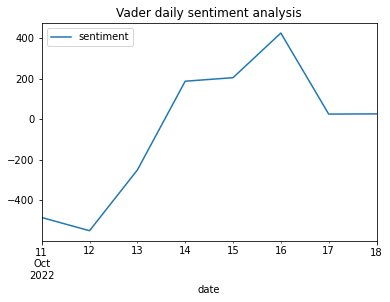

In [120]:
centiment_graph("daily","Vader", vader_lSentiment)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


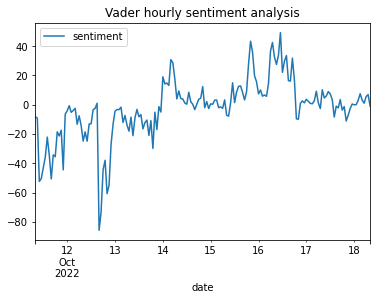

In [121]:
centiment_graph("hourly","Vader", vader_lSentiment)

In [122]:
def getAverageSentiment(sentiment):
    sum = 0
    for snt in sentiment:
        sum+=snt[1]
    print(sum/len(sentiment))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
getAverageSentiment(count_lSentiment)

-0.20695250577295138


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
getAverageSentiment(vader_lSentiment)

-0.026104786868877853


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
len(count_lSentiment)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16023

In [125]:
len(tweets_df)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16023

In [126]:
def return_sentiment(x):
    if x > 0:
        return "positive"
    elif x < 0:
        return "negative"
    return "neutral"

tweets_df['sentiment_score_count'] = [score[1] for score in count_lSentiment]
tweets_df['sentiment_count'] = tweets_df['sentiment_score_count'].apply(return_sentiment)
tweets_df['sentiment_score_vader'] = [score[1] for score in vader_lSentiment]
tweets_df['sentiment_vader'] = tweets_df['sentiment_score_vader'].apply(return_sentiment)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
tweets_df['sentiment_count'].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


negative    6321
neutral     5681
positive    4021
Name: sentiment_count, dtype: int64

In [128]:
tweets_df['sentiment_vader'].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


positive    6706
negative    6176
neutral     3141
Name: sentiment_vader, dtype: int64

# LDA Model

In [169]:
lTweets = []

for tweet_id in token_dic:
    date = token_dic[tweet_id]['time']
    lTokens = token_dic[tweet_id]['tokens']
    lTweets.append(' '.join(lTokens))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
topicNum = 3
wordNumToDisplay = 10
featureNum = 100

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [177]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lTweets)

tfFeatureNames = tfVectorizer.get_feature_names()

ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [178]:
def display_topics(model, featureNames, numTopWords):
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
immigrate uk policy white indian people deal want india visa
Topic 1:
immigrate uk relax braverman plan suella illegal rule year reform
Topic 2:
immigrate government illegal stop uk help start job home prove


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [180]:
import pyLDAvis.sklearn

panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warni

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


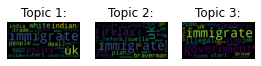

In [181]:
import numpy as np
import math
from wordcloud import WordCloud

def displayWordcloud(model, featureNames):

    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

    topicNum = len(model.components_)
    plotColNum = 4
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)
displayWordcloud(ldaModel, tfFeatureNames)

In [136]:
import networkx as nx

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
energyGraph = nx.Graph()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
tweets_df.columns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'text', 'time', 'hastags', 'mentions', 'language',
       'retweet count', 'like_count', 'country', 'author_id', 'username',
       'year', 'month', 'day', 'hour', 'sentiment_score_count',
       'sentiment_count', 'sentiment_score_vader', 'sentiment_vader'],
      dtype='object')

In [139]:
pos_data = tweets_df[tweets_df['sentiment_count'] ==  'positive'][['username', 'sentiment_score_count', 'author_id', 'retweet count', 'id']]
pos_data.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


username  sentiment_score_count            author_id  \
8   iam_immigration                      2            489043848   
26  JohninBucuresti                      1  1262108051601047553   
33    Sangita123000                      2            289618685   
37  peterbrownbarra                      1           1362564518   
38  peterbrownbarra                      1           1362564518   

    retweet count                   id  
8               0  1582284238300532738  
26              0  1582282219917561862  
33              0  1582279918829740035  
37              0  1582279426535890945  
38              0  1582279358785683456

In [140]:
neg_data = tweets_df[tweets_df['sentiment_count'] ==  'negative'][['username', 'sentiment_score_count', 'author_id', 'retweet count', 'id']]
neg_data.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


username  sentiment_score_count            author_id  retweet count  \
0  wahegurujimehar                     -1   869871708643119104            332   
1     chandru_race                     -1            120399553            332   
2   rajneesh_dev21                     -1            790858536            332   
3           SmjSri                     -1           3625825466            332   
4  Ashwathama_Kris                     -1  1326209278152159235            332   

                    id  
0  1582284891173310465  
1  1582284888006627328  
2  1582284725431177216  
3  1582284679193178115  
4  1582284580715122690

In [141]:
neg_data = neg_data[neg_data['retweet count'] != 0]
neg_data.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5326, 5)

In [142]:
neg_data = neg_data.head(1000)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
neg_data['retweet count'].sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


299628

In [144]:
len(neg_data)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1000

In [145]:
for i in neg_data.itertuples():
    energyGraph.add_node(i[1], score = i[2], retweets = i[4])
    for j in range(i[4]):
        energyGraph.add_node(f'{i[5]}_{j}', nature = 'neg')
        energyGraph.add_edge(i[2], f'{i[5]}_{j}')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
len(energyGraph.nodes())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


300568

In [147]:
with open('Graphs/ImmigrationPolicyNeg.graphml', 'wb') as fOut:
    nx.write_graphml(energyGraph, fOut)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [148]:
energyGraph.clear()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
pos_data = pos_data[pos_data['retweet count'] != 0]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
pos_data.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3294, 5)

In [151]:
pos_data = pos_data.head(1000)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [152]:
pos_data['retweet count'].sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


465010

In [153]:
len(pos_data)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1000

In [154]:
for i in pos_data.itertuples():
    energyGraph.add_node(i[1], score = i[2], retweets = i[4])
    for j in range(i[4]):
        energyGraph.add_node(f'{i[5]}_{j}', nature = 'pos')
        energyGraph.add_edge(i[2], f'{i[5]}_{j}')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
len(energyGraph.nodes())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


465968

In [156]:
with open('Graphs/ImmigrationPolicyPos.graphml', 'wb') as fOut:
    nx.write_graphml(energyGraph, fOut)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
